
#**SmartPlant Protein**

#Eficiencia en cada gramo, inteligencia en cada proceso

#**Contenido**

1.   Elemento de lista
2.   Elemento de lista


#1. Definición del problema
1.1 Objetivos del proyecto

1.2 Funcionalidades principales

1.3 Beneficios del proyecto

1.4 Modelos y técnicas
#2. Cargando Librerias y el conjunto de datos
2.1. Cargando librerias

2.2. Cargando el conjunto de datos

2.3. Tratamiento de datos

#3. Análisis de datos exploratorio
3.1 Estadística descriptiva

3.2. Visualización de datos

3.3. Análisis de la serie de tiempo
#4. Preparación de datos

4.1 Limpieza de datos

4.2.Selección de características
#5. Modelos predictivos

5.1 Regresión lineal
#6. Análisis de series temporales

6.1 Modelo ARIMA
#7. Optimización de la cadena de suministro

7.1 Programación Lineal
#8. Visualización de resultados

8.1 Herramienta seaborn

8.2 Herramienta Plotly


#1. Definición del problema
SmartPlant Protein es un sistema integral diseñado para mapear y monitorear cada fase de la producción y comercialización de proteínas vegetales, enfocándose en nuggets y hamburguesas. Este proyecto abarca desde la selección y procesamiento de ingredientes hasta la distribución y venta final, proporcionando una visión completa y detallada de cada paso en la cadena de valor.

#1.1 Objetivos del proyecto

1.Mapear la Cadena de Producción

2.Automatizar y Monitorear para optimizar  el flujo de trabajo

3.Utilizar la data de costos de producción y comercialización para mejorar la eficiencia financiera

#1.2 Funcionalidades principales

1.Acceso a datos en tiempo real sobre cada fase de la producción y venta

2.Desglose de los costos de producción y comercialización

3.Trazabilidad completa del producto


#1.3 Beneficios del proyecto
1.El análisis de costos detallado y la automatización del proceso permiten reducir gastos innecesarios.

2.enfoque en la eficiencia de recursos y la trazabilidad completa respalda un modelo de negocio más sostenible

#1.4 Modelos y técnicas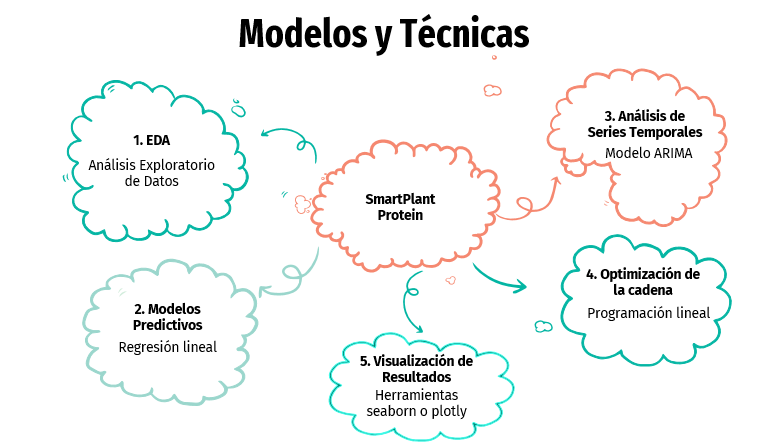

#2 Cargando Librerias y conjunto de datos
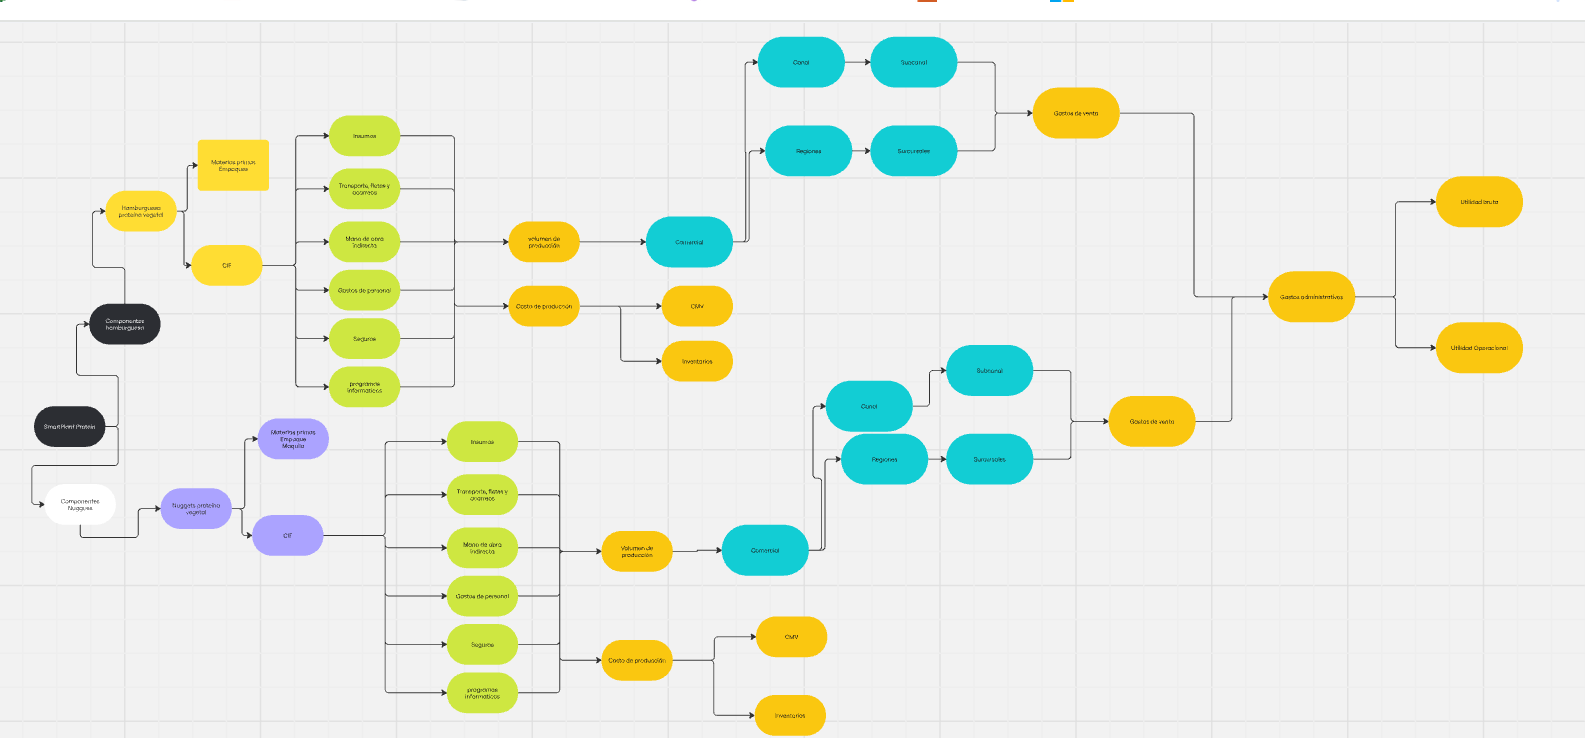



> Añadir blockquote


## 2.1 Cargando librerías



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
!pip install pmdarima
import pmdarima as pm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.9 MB/s eta 0:00:00




> Añadir blockquote


## 2.2 cargando el conjunto de datos

---



In [ ]:
ventas_df = pd.read_excel('/content/ventas de vegetal.xlsx')
costos_df = pd.read_excel('/content/costo  vegetal.xlsx')
volumen_produccion_df = pd.read_excel('/content/Volumen_produccion.xlsx')
parametros_df = pd.read_excel('/content/Parametros.xlsx')


In [ ]:
import pandas as pd
ER_df = pd.read_excel('/content/ER_Proteina_vegetal.xlsx')

In [ ]:
ER_df.head()

,Indice,Unidad de Negocio,Fecha,CANAL_MBIOS,AGENCIA_MBIOS,Cliente,SEGMENTOS_MBIOS,REFERENCIA,DESC_ITEM,DETALLE_MARCAS_MBIOS,...,Utilidad Operativa,Ebitda,Gastos Financieros,Ingresos Financieros,Otros Ingresos No Operacionales,Utilidad Antes de Impuestos,Gasto por Impuestos,Utilidad del Ejercicio,Cobro corporativo,Utilidad Neta
0,0,Proteina Vegetal,2023-05-01,ALTERNATIVO,ANTIOQUIA/CHOCO,n,PROTEI0 VEGETAL,61550001,HAMBURGUESA PROTEI0 VEGETAL 400G REF,B-GETAL,...,38.605239,-3.854055,2.061768,0.073867,-0.281772,36.335567,0.0,36.335567,0.211960,36.123607
1,1,Proteina Vegetal,2023-04-01,ALTERNATIVO,ANTIOQUIA/CHOCO,n,PROTEI0 VEGETAL,61550001,HAMBURGUESA PROTEI0 VEGETAL 400G REF,B-GETAL,...,-42.323455,-2.894911,1.304439,0.038592,-0.115138,-43.704440,0.0,-43.704440,0.167273,-43.871713
2,2,Proteina Vegetal,2023-07-01,ALTERNATIVO,ANTIOQUIA/CHOCO,n,PROTEI0 VEGETAL,61550001,HAMBURGUESA PROTEI0 VEGETAL 400G REF,B-GETAL,...,7.140233,3.712443,5.041588,0.060456,-0.042650,2.116450,0.0,2.116450,0.261994,1.854457
3,3,Proteina Vegetal,2023-08-01,ALTERNATIVO,ANTIOQUIA/CHOCO,n,PROTEI0 VEGETAL,61550001,HAMBURGUESA PROTEI0 VEGETAL 400G REF,B-GETAL,...,223.113829,11.290698,4.946327,0.063563,-1.857850,216.373216,0.0,216.373216,0.273295,216.099920
4,4,Proteina Vegetal,2023-04-01,ALTERNATIVO,ANTIOQUIA/CHOCO,n,PROTEI0 VEGETAL,61550002,NUGGETS PROTEI0 VEGETAL 264G CONG,B-GETAL,...,-66.888662,-3.404967,1.534268,0.045392,-0.135424,-68.512963,0.0,-68.512963,0.196745,-68.709708


In [ ]:
ventas_df.head()

,C.O.,SEGMENTOS +BIOS,Cliente factura,Razón social cliente factura,Referencia,Desc. item,Peso en PKIL,U.M. inv.,Cantidad adic.,Precio por PKIL,...,Desc. motivo,Calificación,SEG. VALOR,Lista de precios cliente,Fecha,Ciudad,Causal devol.,Ciudad del punto de envio,Fecha pedido,Notas causal dev.
0,107,0021 - PROTEINA VEGETAL,891401858,OPERADORA AVICOLA COLOMBIA S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,275.34,UNID,0,44623.0769,...,VENTAS NACIONALES,A,04 - COBRE,MDO-LISTA DONACIONES Y DEGUSTACIONES,2023-12-26,266.0,,266-Envigado,2023-12-22,NaN
1,340,0021 - PROTEINA VEGETAL,891401858,OPERADORA AVICOLA COLOMBIA S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,22.36,UNID,0,44623.0769,...,VENTAS NACIONALES,A,04 - COBRE,MDO-LISTA DONACIONES Y DEGUSTACIONES,2023-12-26,266.0,,266-Envigado,NaT,NaN
2,107,0021 - PROTEINA VEGETAL,891401858,OPERADORA AVICOLA COLOMBIA S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,-1.82,UNID,0,44623.0769,...,DEVOLUCION VENTAS DEL PERIODO,A,04 - COBRE,MDO-LISTA DONACIONES Y DEGUSTACIONES,2023-12-27,266.0,49,266-Envigado,NaT,El producto no fue devuelto por el cliente. Se...
3,107,0021 - PROTEINA VEGETAL,891401858,OPERADORA AVICOLA COLOMBIA S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,-149.50,UNID,0,44623.0769,...,DEVOLUCION VENTAS DEL PERIODO,A,04 - COBRE,MDO-LISTA DONACIONES Y DEGUSTACIONES,2023-12-27,266.0,49,266-Envigado,NaT,El producto no fue devuelto por el cliente. Se...
4,341,0021 - PROTEINA VEGETAL,891401858,OPERADORA AVICOLA COLOMBIA S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,-17.16,UNID,0,44623.0769,...,NOTA CREDITO ANULACION FACTURAS,A,04 - COBRE,MDO-LISTA DONACIONES Y DEGUSTACIONES,2023-12-27,266.0,49,266-Envigado,NaT,El producto no fue devuelto por el cliente. Se...


In [ ]:
costos_df.head()

,MAYOR,CUENTA,SUBCUENTA,Auxiliar,Desc. auxiliar,C.Costo,Desc. C.Costo,C.O.,Desc. C.O.,U.N.,...,N1:(2023/09 a 2023/09),N2:(2023/10 a 2023/10),N4:(2023/12 a 2023/12),N3:(2023/11 a 2023/11),N5:(2024/01 a 2024/01),N6:(2024/02 a 2024/02),N8:(2024/04 a 2024/04),N7:(2024/03 a 2024/03),N9:(2024/05 a 2024/05),N10:(2024/06 a 2024/06)
0,7P710502-MATERIA PRIMA EMPAQUES,7P71-MATERIA PRIMA,7P7105-AVICOLA,71050102,MATERIA PRIMA DE EMPAQUE,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,8686037.07,1.475823e+07,4082757.35,1.309659e+07,6064102.66,4462458.17,3215883.59,5328236.66,6417301.86,1.221412e+07
1,7P710502-MATERIA PRIMA EMPAQUES,7P71-MATERIA PRIMA,7P7105-AVICOLA,71050102,MATERIA PRIMA DE EMPAQUE,46009001,ALMACEN PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,0.00,0.000000e+00,0.00,0.000000e+00,4083025.10,0.00,1544544.00,0.00,0.00,0.000000e+00
2,7P710599-CIERRE COSTOS DE PRODUCCION,7P71-MATERIA PRIMA,7P7105-AVICOLA,71999999,TRASLADO (CUENTA CIERRE),46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,-76854844.58,-1.178183e+08,-24567258.66,-1.105646e+08,-71991179.39,-51457521.21,-42721227.60,-45204966.21,-61299794.57,-1.004997e+08
3,7P710599-CIERRE COSTOS DE PRODUCCION,7P71-MATERIA PRIMA,7P7105-AVICOLA,71999999,TRASLADO (CUENTA CIERRE),46009001,ALMACEN PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,0.00,-1.643777e+06,0.00,0.000000e+00,-4083025.10,0.00,-1249991.28,0.00,0.00,0.000000e+00
4,7P712501-PROTEINA VEGETAL,7P71-MATERIA PRIMA,7P7125-PROTEINA VEGETAL,71050125,MATERIA PRIMA PROTEINA VEGETAL,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,68168807.51,1.030601e+08,20484501.31,9.746800e+07,65927076.73,46995063.04,39505344.01,39876729.55,54882492.71,8.828557e+07


#2.3 Tratamiento de datos

Base Costos

In [ ]:
costos_df

# Separación de los datos por la columna "CUENTA" en diferentes DataFrames utilizando "costos_df"
unique_accounts = costos_df['CUENTA'].unique()

account_dataframes = {account: costos_df[costos_df['CUENTA'] == account] for account in unique_accounts}

len(account_dataframes), list(account_dataframes.keys())


(4,
 ['7P71-MATERIA PRIMA                           ',
  '7P72-MANO DE OBRA INDIRECTA                  ',
  '7P73-COSTOS INDIRECTOS                       ',
  '7P74-CONTRATOS DE SERVICIO                   '])

Se analiaza información de materia prima

In [ ]:
# Filtrado de los datos de "MATERIA PRIMA" y conversión
materia_prima_df = account_dataframes['7P71-MATERIA PRIMA                           ']
materia_prima_df.head()


,MAYOR,CUENTA,SUBCUENTA,Auxiliar,Desc. auxiliar,C.Costo,Desc. C.Costo,C.O.,Desc. C.O.,U.N.,...,N1:(2023/09 a 2023/09),N2:(2023/10 a 2023/10),N4:(2023/12 a 2023/12),N3:(2023/11 a 2023/11),N5:(2024/01 a 2024/01),N6:(2024/02 a 2024/02),N8:(2024/04 a 2024/04),N7:(2024/03 a 2024/03),N9:(2024/05 a 2024/05),N10:(2024/06 a 2024/06)
0,7P710502-MATERIA PRIMA EMPAQUES,7P71-MATERIA PRIMA,7P7105-AVICOLA,71050102,MATERIA PRIMA DE EMPAQUE,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,8686037.07,1.475823e+07,4082757.35,1.309659e+07,6064102.66,4462458.17,3215883.59,5328236.66,6417301.86,1.221412e+07
1,7P710502-MATERIA PRIMA EMPAQUES,7P71-MATERIA PRIMA,7P7105-AVICOLA,71050102,MATERIA PRIMA DE EMPAQUE,46009001,ALMACEN PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,0.00,0.000000e+00,0.00,0.000000e+00,4083025.10,0.00,1544544.00,0.00,0.00,0.000000e+00
2,7P710599-CIERRE COSTOS DE PRODUCCION,7P71-MATERIA PRIMA,7P7105-AVICOLA,71999999,TRASLADO (CUENTA CIERRE),46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,-76854844.58,-1.178183e+08,-24567258.66,-1.105646e+08,-71991179.39,-51457521.21,-42721227.60,-45204966.21,-61299794.57,-1.004997e+08
3,7P710599-CIERRE COSTOS DE PRODUCCION,7P71-MATERIA PRIMA,7P7105-AVICOLA,71999999,TRASLADO (CUENTA CIERRE),46009001,ALMACEN PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,0.00,-1.643777e+06,0.00,0.000000e+00,-4083025.10,0.00,-1249991.28,0.00,0.00,0.000000e+00
4,7P712501-PROTEINA VEGETAL,7P71-MATERIA PRIMA,7P7125-PROTEINA VEGETAL,71050125,MATERIA PRIMA PROTEINA VEGETAL,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,68168807.51,1.030601e+08,20484501.31,9.746800e+07,65927076.73,46995063.04,39505344.01,39876729.55,54882492.71,8.828557e+07


Se depura información debido a que, se cuenta con datos desde enero del 2024, y se elmina la cuenta de cierre, adicional se agrega el total de materia prima

In [ ]:

# Filter out rows where 'MAYOR' is equal to '7P710599-CIERRE COSTOS DE PRODUCCION'
materia_prima_df_filtered = materia_prima_df[materia_prima_df['MAYOR'] != '7P710599-CIERRE COSTOS DE PRODUCCION']

# Sorting the DataFrame in descending order for the specified columns
materia_prima_df_sorted = materia_prima_df_filtered.sort_values(by=sort_columns, ascending=False)

# Display the resulting DataFrame to confirm the changes
materia_prima_df_sorted.head()



,MAYOR,CUENTA,SUBCUENTA,Auxiliar,Desc. auxiliar,C.Costo,Desc. C.Costo,C.O.,Desc. C.O.,U.N.,...,N1:(2023/09 a 2023/09),N2:(2023/10 a 2023/10),N4:(2023/12 a 2023/12),N3:(2023/11 a 2023/11),N5:(2024/01 a 2024/01),N6:(2024/02 a 2024/02),N8:(2024/04 a 2024/04),N7:(2024/03 a 2024/03),N9:(2024/05 a 2024/05),N10:(2024/06 a 2024/06)


In [ ]:
# Filas correspondientes a 'MATERIA PRIMA PROTEINA VEGETAL' y 'MATERIA PRIMA DE EMPAQUE' filtradas
materia_prima_proteina_vegetal = materia_prima_df_filtered[materia_prima_df_filtered['Desc. auxiliar'] == 'MATERIA PRIMA PROTEINA VEGETAL']
materia_prima_empaque = materia_prima_df_filtered[materia_prima_df_filtered['Desc. auxiliar'] == 'MATERIA PRIMA DE EMPAQUE']

# Calculo de las sumas de las columnas monetarias para 'MATERIA PRIMA PROTEINA VEGETAL'
sum_proteina_vegetal = materia_prima_proteina_vegetal[ordered_columns].sum()
sum_proteina_vegetal['Desc. auxiliar'] = 'TOTAL MATERIA PRIMA PROTEINA VEGETAL'

# Calculo de las sumas de las columnas monetarias para 'MATERIA PRIMA DE EMPAQUE'
sum_empaque = materia_prima_empaque[ordered_columns].sum()
sum_empaque['Desc. auxiliar'] = 'TOTAL MATERIA PRIMA DE EMPAQUE'

totales_df = pd.DataFrame([sum_proteina_vegetal, sum_empaque])
totales_df.set_index('Desc. auxiliar', inplace=True)

print("Totales DataFrame:")
print(totales_df)


Totales DataFrame:
                                      MAYOR  CUENTA  SUBCUENTA  Auxiliar  \
Desc. auxiliar                                                             
TOTAL MATERIA PRIMA PROTEINA VEGETAL      0       0          0         0   
TOTAL MATERIA PRIMA DE EMPAQUE            0       0          0         0   

                                      C.Costo  Desc. C.Costo  C.O.  \
Desc. auxiliar                                                       
TOTAL MATERIA PRIMA PROTEINA VEGETAL        0              0     0   
TOTAL MATERIA PRIMA DE EMPAQUE              0              0     0   

                                      Desc. C.O.  U.N.  
Desc. auxiliar                                          
TOTAL MATERIA PRIMA PROTEINA VEGETAL           0     0  
TOTAL MATERIA PRIMA DE EMPAQUE                 0     0  


Se trabaja con volumenes de producción

In [ ]:
# Unión
volumen_produccion_clasificado_df = pd.merge(volumen_produccion_df, parametros_df, on='Referencia', how='left')

volumen_produccion_clasificado_df.set_index('Producto_y', inplace=True)

volumen_produccion_clasificado_df.head()



,Referencia,Producto_x,Enero,Febrero,Marzo,Abril,Mayo,Junio,Producción vegetal
Producto_y,,,,,,,,,
Nuggets,61550002,NUGGETS VEGETARIANOS,417.96,327.96,427.96,448.24,975.52,2908.36,NUGGETS VEGETARIANOS
Hamburguesa,61550001,HAMBURGUESA VEGETARIANA,975.60,1075.60,875.60,1011.20,890.40,640.00,HAMBURGUESA VEGETARIANA
Nuggets,61550004,DEGUSTACION NUGGETS,0.00,0.00,0.00,942.48,0.00,0.00,DEGUSTACION NUGGETS
Hamburguesa,61550005,DEGUSTACION HAMBURGUESA,0.00,0.00,0.00,0.00,0.00,0.00,DEGUSTACION HAMBURGUESA
Hamburguesa,61550006,BOLSA HAMBURGUESA X2,0.00,0.00,0.00,0.00,0.00,0.00,BOLSA HAMBURGUESA X2


In [ ]:
# Suma total de cada columna de producción (Enero a Junio)
suma_total_volumen_produccion_mes = produccion_clasificado_df[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']].sum()

print("Suma total de volumen de producción mes a mes:")
print(suma_total_volumen_produccion_mes)


Suma total de volumen de producción mes a mes:
Enero      2239.44
Febrero    2149.44
Marzo      2249.44
Abril      2401.92
Mayo       3253.28
Junio      5171.28
dtype: float64


se halla el valor por tonelada de producción para materias primas

In [ ]:
# Valores correspondientes a "TOTAL MATERIA PRIMA PROTEINA VEGETAL" y "TOTAL MATERIA PRIMA DE EMPAQUE" mes a mes
total_materia_prima_proteina_vegetal = totales_df.loc['TOTAL MATERIA PRIMA PROTEINA VEGETAL', ordered_columns]
total_materia_prima_empaque = totales_df.loc['TOTAL MATERIA PRIMA DE EMPAQUE', ordered_columns]

total_materia_prima_proteina_vegetal.index = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
total_materia_prima_empaque.index = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

# División de los totales mes a mes por la suma total de producción mes a mes
ratio_proteina_vegetal_mes = total_materia_prima_proteina_vegetal / suma_total_volumen_produccion_mes
ratio_empaque_mes = total_materia_prima_empaque / suma_total_volumen_produccion_mes

#Ratios en miles
ratio_proteina_vegetal_mes_miles = ratio_proteina_vegetal_mes
ratio_empaque_mes_miles = ratio_empaque_mes

ratios_final_df = pd.DataFrame({
    'Ratio Materia Prima Proteína Vegetal (Miles)': ratio_proteina_vegetal_mes_miles,
    'Ratio Materia Prima Empaque (Miles)': ratio_empaque_mes_miles
})

print("Ratios Materia Prima (Miles) - Mes a Mes:")
print(ratios_final_df)



Ratios Materia Prima (Miles) - Mes a Mes:
         Ratio Materia Prima Proteína Vegetal (Miles)  \
Enero                                    29439.090456   
Febrero                                  21863.863630   
Marzo                                    17727.403065   
Abril                                    16324.769888   
Mayo                                     16869.895217   
Junio                                    17072.284833   

         Ratio Materia Prima Empaque (Miles)  
Enero                            4531.100525  
Febrero                          2076.102692  
Marzo                            2368.694724  
Abril                            1981.925955  
Mayo                             1972.563647  
Junio                            2361.913687  


In [ ]:
#DataFrames "produccion_df" y "parametros_df" usando la columna "Referencia" como clave
produccion_clasificado_df = pd.merge(produccion_df, parametros_df, on='Referencia', how='left')

# Suma total de cada columna de producción (Enero a Junio)
suma_total_volumen_produccion_mes = produccion_clasificado_df[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']].sum()

# Filas correspondientes a 'MATERIA PRIMA PROTEINA VEGETAL' y 'MATERIA PRIMA DE EMPAQUE'
materia_prima_proteina_vegetal = materia_prima_df_filtered[materia_prima_df_filtered['Desc. auxiliar'] == 'MATERIA PRIMA PROTEINA VEGETAL']
materia_prima_empaque = materia_prima_df_filtered[materia_prima_df_filtered['Desc. auxiliar'] == 'MATERIA PRIMA DE EMPAQUE']

# Suma de las columnas monetarias para 'MATERIA PRIMA PROTEINA VEGETAL' y 'MATERIA PRIMA DE EMPAQUE'
ordered_columns = ['N5:(2024/01 a 2024/01)', 'N6:(2024/02 a 2024/02)', 'N7:(2024/03 a 2024/03)',
                   'N8:(2024/04 a 2024/04)', 'N9:(2024/05 a 2024/05)', 'N10:(2024/06 a 2024/06)']

total_materia_prima_proteina_vegetal = materia_prima_proteina_vegetal[ordered_columns].sum()
total_materia_prima_empaque = materia_prima_empaque[ordered_columns].sum()

total_materia_prima_proteina_vegetal.index = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
total_materia_prima_empaque.index = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

# Dividisión de los totales mes a mes por la suma total de producción mes a mes
ratio_proteina_vegetal_mes = total_materia_prima_proteina_vegetal / suma_total_volumen_produccion_mes
ratio_empaque_mes = total_materia_prima_empaque / suma_total_volumen_produccion_mes

ratios_final_df = pd.DataFrame({
    'Ratio Materia Prima Proteína Vegetal': ratio_proteina_vegetal_mes,
    'Ratio Materia Prima Empaque': ratio_empaque_mes
})

print("Ratios Materia Prima - Mes a Mes:")
print(ratios_final_df)

# Costo para el producto 'Nuggets' y 'Hamburguesa' multiplicando los ratios de cada mes por el volumen de cada producto
costos_nuggets = {'Proteína Vegetal': {}, 'Empaque': {}}
costos_hamburguesa = {'Proteína Vegetal': {}, 'Empaque': {}}
for mes in ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']:
    # Costos para Nuggets (Materia Prima Proteína Vegetal)
    costos_nuggets['Proteína Vegetal'][mes] = ratios_final_df.loc[mes, 'Ratio Materia Prima Proteína Vegetal'] * produccion_clasificado_df.loc[produccion_clasificado_df['Producto_x'] == 'NUGGETS VEGETARIANOS', mes].values[0]
    # Costos para Nuggets (Materia Prima Empaque)
    costos_nuggets['Empaque'][mes] = ratios_final_df.loc[mes, 'Ratio Materia Prima Empaque'] * produccion_clasificado_df.loc[produccion_clasificado_df['Producto_x'] == 'NUGGETS VEGETARIANOS', mes].values[0]

    # Costos para Hamburguesa (Materia Prima Proteína Vegetal)
    costos_hamburguesa['Proteína Vegetal'][mes] = ratios_final_df.loc[mes, 'Ratio Materia Prima Proteína Vegetal'] * produccion_clasificado_df.loc[produccion_clasificado_df['Producto_x'] == 'HAMBURGUESA VEGETARIANA', mes].values[0]
    # Costos para Hamburguesa (Materia Prima Empaque)
    costos_hamburguesa['Empaque'][mes] = ratios_final_df.loc[mes, 'Ratio Materia Prima Empaque'] * produccion_clasificado_df.loc[produccion_clasificado_df['Producto_x'] == 'HAMBURGUESA VEGETARIANA', mes].values[0]

print("Costos Nuggets (Enero a Junio):")
print(costos_nuggets)
print("Costos Hamburguesa (Enero a Junio):")
print(costos_hamburguesa)

costos_nuggets_df = pd.DataFrame(costos_nuggets)
costos_hamburguesa_df = pd.DataFrame(costos_hamburguesa)

print("Costos Nuggets (Enero a Junio):")
print(costos_nuggets_df)

print("\nCostos Hamburguesa (Enero a Junio):")
print(costos_hamburguesa_df)


Ratios Materia Prima - Mes a Mes:
         Ratio Materia Prima Proteína Vegetal  Ratio Materia Prima Empaque
Enero                            29439.090456                  4531.100525
Febrero                          21863.863630                  2076.102692
Marzo                            17727.403065                  2368.694724
Abril                            16324.769888                  1981.925955
Mayo                             16869.895217                  1972.563647
Junio                            17072.284833                  2361.913687
Costos Nuggets (Enero a Junio):
{'Proteína Vegetal': {'Enero': 12304362.246843316, 'Febrero': 7170472.715962483, 'Marzo': 7586619.415595882, 'Abril': 7317414.854711898, 'Mayo': 16456920.181619536, 'Junio': 49652350.31623111}, 'Empaque': {'Enero': 1893818.7754838709, 'Febrero': 680878.6388236935, 'Marzo': 1013706.5940916851, 'Abril': 888378.490100253, 'Mayo': 1924275.2884680077, 'Junio': 6869295.289986929}}
Costos Hamburguesa (Enero a Jun

costo de la materia prima por cada una de las categorias

In [ ]:
#DataFrames para los costos de Nuggets y Hamburguesa
df_costos_nuggets = pd.DataFrame(costos_nuggets)
df_costos_hamburguesa = pd.DataFrame(costos_hamburguesa)

print("DataFrame Costos Nuggets (Enero a Junio):")
print(df_costos_nuggets)
print("DataFrame Costos Hamburguesa (Enero a Junio):")
print(df_costos_hamburguesa)

DataFrame Costos Nuggets (Enero a Junio):
         Proteína Vegetal       Empaque
Enero        1.230436e+07  1.893819e+06
Febrero      7.170473e+06  6.808786e+05
Marzo        7.586619e+06  1.013707e+06
Abril        7.317415e+06  8.883785e+05
Mayo         1.645692e+07  1.924275e+06
Junio        4.965235e+07  6.869295e+06
DataFrame Costos Hamburguesa (Enero a Junio):
         Proteína Vegetal       Empaque
Enero        2.872078e+07  4.420542e+06
Febrero      2.351677e+07  2.233056e+06
Marzo        1.552211e+07  2.074029e+06
Abril        1.650761e+07  2.004124e+06
Mayo         1.502095e+07  1.756371e+06
Junio        1.092626e+07  1.511625e+06


In [ ]:
#Datos de "MATERIA PRIMA"
mano_obra_indirecta_df = account_dataframes['7P72-MANO DE OBRA INDIRECTA                  ']
costos_indirectos_df = account_dataframes['7P73-COSTOS INDIRECTOS                       ']

mano_obra_indirecta_df.head()



,MAYOR,CUENTA,SUBCUENTA,Auxiliar,Desc. auxiliar,C.Costo,Desc. C.Costo,C.O.,Desc. C.O.,U.N.,...,N1:(2023/09 a 2023/09),N2:(2023/10 a 2023/10),N4:(2023/12 a 2023/12),N3:(2023/11 a 2023/11),N5:(2024/01 a 2024/01),N6:(2024/02 a 2024/02),N8:(2024/04 a 2024/04),N7:(2024/03 a 2024/03),N9:(2024/05 a 2024/05),N10:(2024/06 a 2024/06)
6,7P720501-SALARIO,7P72-MANO DE OBRA INDIRECTA,7P7205-MANO DE OBRA INDIRECTA,72050601,SUELDOS,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,16991100.0,16235940.0,18123839.0,15732502.0,20170155.0,19370866.0,3385200.0,4231500.0,2821000.0,2162767.0
7,7P720501-SALARIO,7P72-MANO DE OBRA INDIRECTA,7P7205-MANO DE OBRA INDIRECTA,72050603,RECARGO NOCTURNO,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,375144.0,153468.0,474614.0,276716.0,324416.0,536143.0,95550.0,92365.0,47775.0,50960.0
8,7P720502-HORAS EXTRAS Y RECARGOS,7P72-MANO DE OBRA INDIRECTA,7P7205-MANO DE OBRA INDIRECTA,72050604,RECARGO,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,73418.0,146836.0,2496218.0,808546.0,124746.0,698499.0,191859.0,82279.0,246837.0,164558.0
9,7P720502-HORAS EXTRAS Y RECARGOS,7P72-MANO DE OBRA INDIRECTA,7P7205-MANO DE OBRA INDIRECTA,72051501,HORAS EXTRAS,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,25353.0,20300.0,791699.0,94734.0,0.0,20475.0,0.0,0.0,0.0,15167.0
10,7P720505-INCAPACIDADES,7P72-MANO DE OBRA INDIRECTA,7P7205-MANO DE OBRA INDIRECTA,72052401,INCAPACIDADES ASUMIDAS,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,87781.0,0.0,0.0,0.0,0.0,0.0,43333.0,0.0,0.0,0.0


In [ ]:
costos_indirectos_df.head()

,MAYOR,CUENTA,SUBCUENTA,Auxiliar,Desc. auxiliar,C.Costo,Desc. C.Costo,C.O.,Desc. C.O.,U.N.,...,N1:(2023/09 a 2023/09),N2:(2023/10 a 2023/10),N4:(2023/12 a 2023/12),N3:(2023/11 a 2023/11),N5:(2024/01 a 2024/01),N6:(2024/02 a 2024/02),N8:(2024/04 a 2024/04),N7:(2024/03 a 2024/03),N9:(2024/05 a 2024/05),N10:(2024/06 a 2024/06)
30,7P730512-AUXILIOS,7P73-COSTOS INDIRECTOS,7P7305-GASTOS DE PERSONAL,73054504,AUXILIO POR EDUCACION,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,0.0,0.0,826518.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,7P730512-AUXILIOS,7P73-COSTOS INDIRECTOS,7P7305-GASTOS DE PERSONAL,73054518,"AUXILIO INVALIDEZ, VEJEZ Y MUERTE",46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,0.0,0.0,8697479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,7P730518-BIENESTAR AL PERSONAL,7P73-COSTOS INDIRECTOS,7P7305-GASTOS DE PERSONAL,73059502,BIENESTAR AL PERSONAL,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,7P730519-APORTES SEGURIDAD SOCIAL,7P73-COSTOS INDIRECTOS,7P7305-GASTOS DE PERSONAL,73057001,APORTES A FONDOS DE PENSION,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,-34300.0,47700.0,57600.0,-45600.0,0.0,8500.0,0.0,15600.0,0.0,0.0
34,7P730522-GASTOS MEDICOS Y DROGAS,7P73-COSTOS INDIRECTOS,7P7305-GASTOS DE PERSONAL,73058401,GASTOS MEDICOS Y DROGAS,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224900.0,0.0


In [ ]:
# Unión
combined_df = pd.concat([mano_obra_indirecta_df, costos_indirectos_df])

combined_df.head()

,MAYOR,CUENTA,SUBCUENTA,Auxiliar,Desc. auxiliar,C.Costo,Desc. C.Costo,C.O.,Desc. C.O.,U.N.,...,N1:(2023/09 a 2023/09),N2:(2023/10 a 2023/10),N4:(2023/12 a 2023/12),N3:(2023/11 a 2023/11),N5:(2024/01 a 2024/01),N6:(2024/02 a 2024/02),N8:(2024/04 a 2024/04),N7:(2024/03 a 2024/03),N9:(2024/05 a 2024/05),N10:(2024/06 a 2024/06)
6,7P720501-SALARIO,7P72-MANO DE OBRA INDIRECTA,7P7205-MANO DE OBRA INDIRECTA,72050601,SUELDOS,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,16991100.0,16235940.0,18123839.0,15732502.0,20170155.0,19370866.0,3385200.0,4231500.0,2821000.0,2162767.0
7,7P720501-SALARIO,7P72-MANO DE OBRA INDIRECTA,7P7205-MANO DE OBRA INDIRECTA,72050603,RECARGO NOCTURNO,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,375144.0,153468.0,474614.0,276716.0,324416.0,536143.0,95550.0,92365.0,47775.0,50960.0
8,7P720502-HORAS EXTRAS Y RECARGOS,7P72-MANO DE OBRA INDIRECTA,7P7205-MANO DE OBRA INDIRECTA,72050604,RECARGO,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,73418.0,146836.0,2496218.0,808546.0,124746.0,698499.0,191859.0,82279.0,246837.0,164558.0
9,7P720502-HORAS EXTRAS Y RECARGOS,7P72-MANO DE OBRA INDIRECTA,7P7205-MANO DE OBRA INDIRECTA,72051501,HORAS EXTRAS,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,25353.0,20300.0,791699.0,94734.0,0.0,20475.0,0.0,0.0,0.0,15167.0
10,7P720505-INCAPACIDADES,7P72-MANO DE OBRA INDIRECTA,7P7205-MANO DE OBRA INDIRECTA,72052401,INCAPACIDADES ASUMIDAS,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,87781.0,0.0,0.0,0.0,0.0,0.0,43333.0,0.0,0.0,0.0


In [ ]:
# Columna "MAYOR" a texto
combined_df['MAYOR'] = combined_df['MAYOR'].astype(str).str.strip()

# Valores por eliminar
valores_a_eliminar = ["7P729901-CIERRE COSTOS DE PRODUCCION", "7P739901-CIERRE COSTOS DE PRODUCCION"]

#Eliminar valores
filtered_df = combined_df[~combined_df['MAYOR'].isin(valores_a_eliminar)]

filtered_df.head()


,MAYOR,CUENTA,SUBCUENTA,Auxiliar,Desc. auxiliar,C.Costo,Desc. C.Costo,C.O.,Desc. C.O.,U.N.,...,N1:(2023/09 a 2023/09),N2:(2023/10 a 2023/10),N4:(2023/12 a 2023/12),N3:(2023/11 a 2023/11),N5:(2024/01 a 2024/01),N6:(2024/02 a 2024/02),N8:(2024/04 a 2024/04),N7:(2024/03 a 2024/03),N9:(2024/05 a 2024/05),N10:(2024/06 a 2024/06)
6,7P720501-SALARIO,7P72-MANO DE OBRA INDIRECTA,7P7205-MANO DE OBRA INDIRECTA,72050601,SUELDOS,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,16991100.0,16235940.0,18123839.0,15732502.0,20170155.0,19370866.0,3385200.0,4231500.0,2821000.0,2162767.0
7,7P720501-SALARIO,7P72-MANO DE OBRA INDIRECTA,7P7205-MANO DE OBRA INDIRECTA,72050603,RECARGO NOCTURNO,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,375144.0,153468.0,474614.0,276716.0,324416.0,536143.0,95550.0,92365.0,47775.0,50960.0
8,7P720502-HORAS EXTRAS Y RECARGOS,7P72-MANO DE OBRA INDIRECTA,7P7205-MANO DE OBRA INDIRECTA,72050604,RECARGO,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,73418.0,146836.0,2496218.0,808546.0,124746.0,698499.0,191859.0,82279.0,246837.0,164558.0
9,7P720502-HORAS EXTRAS Y RECARGOS,7P72-MANO DE OBRA INDIRECTA,7P7205-MANO DE OBRA INDIRECTA,72051501,HORAS EXTRAS,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,25353.0,20300.0,791699.0,94734.0,0.0,20475.0,0.0,0.0,0.0,15167.0
10,7P720505-INCAPACIDADES,7P72-MANO DE OBRA INDIRECTA,7P7205-MANO DE OBRA INDIRECTA,72052401,INCAPACIDADES ASUMIDAS,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,87781.0,0.0,0.0,0.0,0.0,0.0,43333.0,0.0,0.0,0.0


In [ ]:
# Eliminar columnas no deseadas
columns_to_drop = ['N1:(2023/09 a 2023/09)', 'N2:(2023/10 a 2023/10)', 'N4:(2023/12 a 2023/12)', 'N3:(2023/11 a 2023/11)']
filtered_df = filtered_df.drop(columns=columns_to_drop, errors='ignore')

filtered_df.head()

,MAYOR,SUBCUENTA,Auxiliar,Desc. auxiliar,C.Costo,Desc. C.Costo,C.O.,Desc. C.O.,U.N.,Desc. U.N.,N5:(2024/01 a 2024/01),N6:(2024/02 a 2024/02),N8:(2024/04 a 2024/04),N7:(2024/03 a 2024/03),N9:(2024/05 a 2024/05),N10:(2024/06 a 2024/06)
CUENTA,,,,,,,,,,,,,,,,
7P72-MANO DE OBRA INDIRECTA,7P720501-SALARIO,7P7205-MANO DE OBRA INDIRECTA,72050601,SUELDOS,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,PROTEINA VEGETAL,20170155.0,19370866.0,3385200.0,4231500.0,2821000.0,2162767.0
7P72-MANO DE OBRA INDIRECTA,7P720501-SALARIO,7P7205-MANO DE OBRA INDIRECTA,72050603,RECARGO NOCTURNO,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,PROTEINA VEGETAL,324416.0,536143.0,95550.0,92365.0,47775.0,50960.0
7P72-MANO DE OBRA INDIRECTA,7P720502-HORAS EXTRAS Y RECARGOS,7P7205-MANO DE OBRA INDIRECTA,72050604,RECARGO,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,PROTEINA VEGETAL,124746.0,698499.0,191859.0,82279.0,246837.0,164558.0
7P72-MANO DE OBRA INDIRECTA,7P720502-HORAS EXTRAS Y RECARGOS,7P7205-MANO DE OBRA INDIRECTA,72051501,HORAS EXTRAS,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,PROTEINA VEGETAL,0.0,20475.0,0.0,0.0,0.0,15167.0
7P72-MANO DE OBRA INDIRECTA,7P720505-INCAPACIDADES,7P7205-MANO DE OBRA INDIRECTA,72052401,INCAPACIDADES ASUMIDAS,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,PROTEINA VEGETAL,0.0,0.0,43333.0,0.0,0.0,0.0


In [ ]:
meses = ['N5:(2024/01 a 2024/01)', 'N6:(2024/02 a 2024/02)', 'N7:(2024/03 a 2024/03)',
         'N8:(2024/04 a 2024/04)', 'N9:(2024/05 a 2024/05)', 'N10:(2024/06 a 2024/06)']

# Agrupar por la columna "CUENTA" y sumar los valores de cada mes
suma_por_cuenta = filtered_df.groupby('CUENTA')[meses].sum()

suma_por_cuenta
df_costos_cif = suma_por_cuenta
df_costos_cif.head()

,N5:(2024/01 a 2024/01),N6:(2024/02 a 2024/02),N7:(2024/03 a 2024/03),N8:(2024/04 a 2024/04),N9:(2024/05 a 2024/05),N10:(2024/06 a 2024/06)
CUENTA,,,,,,
7P72-MANO DE OBRA INDIRECTA,33528622.0,32775599.0,9836062.0,5689856.0,6402479.0,4499415.0
7P73-COSTOS INDIRECTOS,3783110.0,3356786.0,3157203.0,3152609.0,4821261.0,5908597.0


In [ ]:

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

# Agrupar por 'Producto_y' y sumar los valores de producción mes a mes
suma_por_producto_y_mes = volumen_produccion_clasificado_df.groupby('Producto_y')[meses].sum()

suma_por_producto_y_mes
df_volumen_produccion = suma_por_producto_y_mes
df_volumen_produccion.head()



,Enero,Febrero,Marzo,Abril,Mayo,Junio
Producto_y,,,,,,
Hamburguesa,975.60,1075.60,875.60,1011.20,890.40,640.00
Nuggets,1263.84,1073.84,1373.84,1390.72,2362.88,4531.28


In [ ]:
import numpy as np
import pandas as pd

#Limpieza de los espacios en blanco en los índices y columnas
df_costos_cif.index = df_costos_cif.index.str.strip()
df_volumen_produccion.index = df_volumen_produccion.index.str.strip()

df_costos_cif.columns = df_costos_cif.columns.str.strip()
df_volumen_produccion.columns = df_volumen_produccion.columns.str.strip()

# Valores numéricos
meses_costos = ['N5:(2024/01 a 2024/01)', 'N6:(2024/02 a 2024/02)', 'N7:(2024/03 a 2024/03)',
                'N8:(2024/04 a 2024/04)', 'N9:(2024/05 a 2024/05)', 'N10:(2024/06 a 2024/06)']
meses_produccion = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

df_costos_cif.columns = meses_produccion

factores_cif_por_producto_y_cuenta = pd.DataFrame()

# Valores de `df_costos_cif` % `df_volumen_produccion`
for cuenta in df_costos_cif.index:
    for producto in df_volumen_produccion.index:
        try:
            # Costos para la cuenta actual
            costos = df_costos_cif.loc[cuenta, meses_produccion]

            # Volúmenes para el producto actual
            volumenes = df_volumen_produccion.loc[producto, meses_produccion]

            # Se reemplaza ceros con NaN en volúmenes para evitar divisiones por cero
            volumenes.replace(0, np.nan, inplace=True)

            # Costos unitarios
            factor = costos / volumenes

            # DataFrame temporal
            resultado = pd.DataFrame([factor], columns=meses_produccion)
            resultado['Producto_y'] = producto
            resultado['CUENTA'] = cuenta

            # Concatenar al DataFrame final
            factores_cif_por_producto_y_cuenta = pd.concat([factores_cif_por_producto_y_cuenta, resultado])

        except Exception as e:
            print(f"Error en el producto '{producto}' y la cuenta '{cuenta}': {e}")

factores_cif_por_producto_y_cuenta.set_index(['Producto_y', 'CUENTA'], inplace=True)

print(factores_cif_por_producto_y_cuenta)


                                                Enero       Febrero  \
Producto_y  CUENTA                                                    
Hamburguesa 7P72-MANO DE OBRA INDIRECTA  34367.181222  30471.921718   
Nuggets     7P72-MANO DE OBRA INDIRECTA  26529.166667  30521.864524   
Hamburguesa 7P73-COSTOS INDIRECTOS        3877.726527   3120.849758   
Nuggets     7P73-COSTOS INDIRECTOS        2993.345677   3125.964762   

                                                Marzo        Abril  \
Producto_y  CUENTA                                                   
Hamburguesa 7P72-MANO DE OBRA INDIRECTA  11233.510735  5626.835443   
Nuggets     7P72-MANO DE OBRA INDIRECTA   7159.539684  4091.302347   
Hamburguesa 7P73-COSTOS INDIRECTOS        3605.759479  3117.690862   
Nuggets     7P73-COSTOS INDIRECTOS        2298.086386  2266.889812   

                                                Mayo        Junio  
Producto_y  CUENTA                                                 
Hamburguesa 7P72

In [ ]:

resultado_df = factores_cif_por_producto_y_cuenta.reset_index()
print(resultado_df)
resultado_df.head()



    Producto_y                       CUENTA         Enero       Febrero  \
0  Hamburguesa  7P72-MANO DE OBRA INDIRECTA  34367.181222  30471.921718   
1      Nuggets  7P72-MANO DE OBRA INDIRECTA  26529.166667  30521.864524   
2  Hamburguesa       7P73-COSTOS INDIRECTOS   3877.726527   3120.849758   
3      Nuggets       7P73-COSTOS INDIRECTOS   2993.345677   3125.964762   

          Marzo        Abril         Mayo        Junio  
0  11233.510735  5626.835443  7190.564915  7030.335938  
1   7159.539684  4091.302347  2709.608190   992.967771  
2   3605.759479  3117.690862  5414.713612  9232.182812  
3   2298.086386  2266.889812  2040.417203  1303.957601  


,Producto_y,CUENTA,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Hamburguesa,7P72-MANO DE OBRA INDIRECTA,34367.181222,30471.921718,11233.510735,5626.835443,7190.564915,7030.335938
1,Nuggets,7P72-MANO DE OBRA INDIRECTA,26529.166667,30521.864524,7159.539684,4091.302347,2709.608190,992.967771
2,Hamburguesa,7P73-COSTOS INDIRECTOS,3877.726527,3120.849758,3605.759479,3117.690862,5414.713612,9232.182812
3,Nuggets,7P73-COSTOS INDIRECTOS,2993.345677,3125.964762,2298.086386,2266.889812,2040.417203,1303.957601


In [ ]:
# Filtro de los datos de "MATERIA PRIMA"
maquila_df = account_dataframes['7P74-CONTRATOS DE SERVICIO                   ']

maquila_df.head()


,MAYOR,CUENTA,SUBCUENTA,Auxiliar,Desc. auxiliar,C.Costo,Desc. C.Costo,C.O.,Desc. C.O.,U.N.,...,N1:(2023/09 a 2023/09),N2:(2023/10 a 2023/10),N4:(2023/12 a 2023/12),N3:(2023/11 a 2023/11),N5:(2024/01 a 2024/01),N6:(2024/02 a 2024/02),N8:(2024/04 a 2024/04),N7:(2024/03 a 2024/03),N9:(2024/05 a 2024/05),N10:(2024/06 a 2024/06)
42,7P740504-MAQUILA DE PROTEÍNA VEGETAL,7P74-CONTRATOS DE SERVICIO,7P7405-CONTRATOS DE SERVICIO,74359513,MAQUILA PROTEINA VEGETAL,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,17241579.0,22228172.0,0.0,21701761.0,9549520.0,8490147.0,7079209.0,7036520.0,9026412.0,20267361.0
43,7P749901-CIERRE COSTOS DE PRODUCCION,7P74-CONTRATOS DE SERVICIO,7P7499-CIERRE COSTOS DE PRODUCCION,74999999,RECLASIFICACION ITEMS (CUENTA CIERRE),46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,-17241579.0,-22228172.0,0.0,-21701761.0,-9549520.0,-8490147.0,-7079209.0,-7036520.0,-9026412.0,-20267361.0


In [ ]:
# Columna "MAYOR" se convierte a texto y se quitan espacios adicionales
maquila_df.loc[:, 'MAYOR'] = maquila_df['MAYOR'].astype(str).str.strip()

# Valores a eliminar
valores_a_eliminar = ["7P749901-CIERRE COSTOS DE PRODUCCION"]

# Eliminación de filas
maquila1_df = maquila_df[~maquila_df['MAYOR'].isin(valores_a_eliminar)]

maquila1_df.head()


,MAYOR,CUENTA,SUBCUENTA,Auxiliar,Desc. auxiliar,C.Costo,Desc. C.Costo,C.O.,Desc. C.O.,U.N.,...,N1:(2023/09 a 2023/09),N2:(2023/10 a 2023/10),N4:(2023/12 a 2023/12),N3:(2023/11 a 2023/11),N5:(2024/01 a 2024/01),N6:(2024/02 a 2024/02),N8:(2024/04 a 2024/04),N7:(2024/03 a 2024/03),N9:(2024/05 a 2024/05),N10:(2024/06 a 2024/06)
42,7P740504-MAQUILA DE PROTEÍNA VEGETAL,7P74-CONTRATOS DE SERVICIO,7P7405-CONTRATOS DE SERVICIO,74359513,MAQUILA PROTEINA VEGETAL,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,...,17241579.0,22228172.0,0.0,21701761.0,9549520.0,8490147.0,7079209.0,7036520.0,9026412.0,20267361.0


In [ ]:
# Columnas a eliminar
columnas_a_eliminar = ['N1:(2023/09 a 2023/09)', 'N2:(2023/10 a 2023/10)', 'N4:(2023/12 a 2023/12)', 'N3:(2023/11 a 2023/11)']

# Eliminar las columnas del DataFrame
maquila1_df = maquila1_df.drop(columns=columnas_a_eliminar, errors='ignore')

maquila1_df.head()


,MAYOR,CUENTA,SUBCUENTA,Auxiliar,Desc. auxiliar,C.Costo,Desc. C.Costo,C.O.,Desc. C.O.,U.N.,Desc. U.N.,N5:(2024/01 a 2024/01),N6:(2024/02 a 2024/02),N8:(2024/04 a 2024/04),N7:(2024/03 a 2024/03),N9:(2024/05 a 2024/05),N10:(2024/06 a 2024/06)
42,7P740504-MAQUILA DE PROTEÍNA VEGETAL,7P74-CONTRATOS DE SERVICIO,7P7405-CONTRATOS DE SERVICIO,74359513,MAQUILA PROTEINA VEGETAL,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,PROTEINA VEGETAL,9549520.0,8490147.0,7079209.0,7036520.0,9026412.0,20267361.0


In [ ]:

meses_costos = ['N5:(2024/01 a 2024/01)', 'N6:(2024/02 a 2024/02)', 'N7:(2024/03 a 2024/03)',
                'N8:(2024/04 a 2024/04)', 'N9:(2024/05 a 2024/05)', 'N10:(2024/06 a 2024/06)']
meses_produccion = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

# Producción del producto 'Nuggets'
produccion_nuggets = df_volumen_produccion.loc['Nuggets', meses_produccion]

# Se reemplaza ceros con NaN para evitar divisiones por cero
produccion_nuggets.replace(0, np.nan, inplace=True)

#  `maquila1_df` correspondientes a los costos % volúmenes de producción de `Nuggets`
maquila_nuggets_dividido = maquila1_df.copy()
maquila_nuggets_dividido[meses_costos] = maquila1_df[meses_costos].div(produccion_nuggets.values)

maquila_nuggets_dividido.head()


,MAYOR,CUENTA,SUBCUENTA,Auxiliar,Desc. auxiliar,C.Costo,Desc. C.Costo,C.O.,Desc. C.O.,U.N.,Desc. U.N.,N5:(2024/01 a 2024/01),N6:(2024/02 a 2024/02),N8:(2024/04 a 2024/04),N7:(2024/03 a 2024/03),N9:(2024/05 a 2024/05),N10:(2024/06 a 2024/06)
42,7P740504-MAQUILA DE PROTEÍNA VEGETAL,7P74-CONTRATOS DE SERVICIO,7P7405-CONTRATOS DE SERVICIO,74359513,MAQUILA PROTEINA VEGETAL,46001001,PLANTA PROTEINA VEGETAL,114,PP-PLANTA DE PROTEINA VEGETAL,80,PROTEINA VEGETAL,7555.95645,7906.342658,5090.319403,5121.790019,3820.089044,4472.767298


In [ ]:
maquila_nuggets_dividido.head()

maquila_nuggets_meses = maquila_nuggets_dividido.loc[:, ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']]

maquila_nuggets_meses


,Enero,Febrero,Marzo,Abril,Mayo,Junio
Producto_y,,,,,,
Nuggets,9549520.0,8490147.0,7036520.0,7079209.0,9026412.0,20267361.0


In [ ]:
df_volumen_produccion
nuggets_volumen_produccion = df_volumen_produccion.loc['Nuggets']
nuggets_volumen_produccion

,Nuggets
Enero,1263.84
Febrero,1073.84
Marzo,1373.84
Abril,1390.72
Mayo,2362.88
Junio,4531.28


In [ ]:
nuggets_volumen_produccion_t

,Enero,Febrero,Marzo,Abril,Mayo,Junio
Mes,,,,,,
Nuggets,1263.84,1073.84,1373.84,1390.72,2362.88,4531.28


In [ ]:
# maquila_nuggets_meses % volumen de producción para el mismo mes
resultado_division_nuggets_meses = maquila_nuggets_meses.div(nuggets_volumen_produccion_t.loc['Nuggets'])
resultado_division_nuggets_meses_rounded = resultado_division_nuggets_meses.round(0)

resultado_division_nuggets_meses_rounded
resultado_division_nuggets_meses_df = pd.DataFrame(resultado_division_nuggets_meses_rounded)


unión dataframe de los costos

In [ ]:

# Agregar la columna 'Producto_y' a ambos DataFrames
costos_nuggets_df['Producto_y'] = 'Nuggets'
costos_hamburguesa_df['Producto_y'] = 'Hamburguesa'

# Concatenar los DataFrames de costos para Nuggets y Hamburguesa
costos_combined_df = pd.concat([costos_nuggets_df, costos_hamburguesa_df])

costos_combined_df = costos_combined_df.reset_index(drop=True)
df_volumen_produccion = df_volumen_produccion.reset_index()
resultado_final_df = resultado_final_df.reset_index()

if 'index' in costos_combined_df.columns:
    costos_combined_df.rename(columns={'index': 'Mes'}, inplace=True)
if 'index' in resultado_final_df.columns:
    resultado_final_df.rename(columns={'index': 'Mes'}, inplace=True)

combined_result_1 = pd.merge(costos_combined_df, df_volumen_produccion, on='Producto_y', how='left')

combined_result_final = pd.merge(combined_result_1, resultado_final_df, on='Producto_y', how='left')

df_todos = combined_result_final

print("DataFrame combinado final:")
print(df_todos.head())


DataFrame combinado final:
   Proteína Vegetal       Empaque Producto_y  level_0_x  index  Enero_x  \
0      1.230436e+07  1.893819e+06    Nuggets          1      1  1263.84   
1      7.170473e+06  6.808786e+05    Nuggets          1      1  1263.84   
2      7.586619e+06  1.013707e+06    Nuggets          1      1  1263.84   
3      7.317415e+06  8.883785e+05    Nuggets          1      1  1263.84   
4      1.645692e+07  1.924275e+06    Nuggets          1      1  1263.84   

   Febrero_x  Marzo_x  Abril_x   Mayo_x  ...  Mes  level_0_y   Mes  \
0    1073.84  1373.84  1390.72  2362.88  ...  0.0        0.0  42.0   
1    1073.84  1373.84  1390.72  2362.88  ...  0.0        0.0  42.0   
2    1073.84  1373.84  1390.72  2362.88  ...  0.0        0.0  42.0   
3    1073.84  1373.84  1390.72  2362.88  ...  0.0        0.0  42.0   
4    1073.84  1373.84  1390.72  2362.88  ...  0.0        0.0  42.0   

                                          CUENTA     Enero_y    Febrero_y  \
0  7P74-CONTRATOS DE SER

In [ ]:
# DataFrames individuales para cada combinación de producto y tipo de materia prima

# DataFrame para costos de Nuggets con proteína vegetal
costos_nuggets_proteina_vegetal_df = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio'],
    'Producto': 'Nuggets',
    'Tipo Materia Prima': 'Proteína Vegetal',
    'Costo': [
        12304362.246843316, 7170472.715962483, 7586619.415595882,
        7317414.854711898, 16456920.181619536, 49652350.31623111
    ]
})

# DataFrame para costos de Nuggets con empaque
costos_nuggets_empaque_df = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio'],
    'Producto': 'Nuggets',
    'Tipo Materia Prima': 'Empaque',
    'Costo': [
        1893818.7754838709, 680878.6388236935, 1013706.5940916851,
        888378.490100253, 1924275.2884680077, 6869295.289986929
    ]
})

# DataFrame para costos de Hamburguesa con proteína vegetal
costos_hamburguesa_proteina_vegetal_df = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio'],
    'Producto': 'Hamburguesa',
    'Tipo Materia Prima': 'Proteína Vegetal',
    'Costo': [
        28720776.648531776, 23516771.719994042, 15522114.123506295,
        16507607.31100453, 15020954.70078936, 10926262.29297195
    ]
})

# DataFrame para costos de Hamburguesa con empaque
costos_hamburguesa_empaque_df = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio'],
    'Producto': 'Hamburguesa',
    'Tipo Materia Prima': 'Empaque',
    'Costo': [
        4420541.6723180795, 2233056.0553688398, 2074029.1003520878,
        2004123.5257660537, 1756370.6708749328, 1511624.7595179528
    ]
})

costos_nuggets_proteina_vegetal_df, costos_nuggets_empaque_df, costos_hamburguesa_proteina_vegetal_df, costos_hamburguesa_empaque_df


(       Mes Producto Tipo Materia Prima         Costo
 0    Enero  Nuggets   Proteína Vegetal  1.230436e+07
 1  Febrero  Nuggets   Proteína Vegetal  7.170473e+06
 2    Marzo  Nuggets   Proteína Vegetal  7.586619e+06
 3    Abril  Nuggets   Proteína Vegetal  7.317415e+06
 4     Mayo  Nuggets   Proteína Vegetal  1.645692e+07
 5    Junio  Nuggets   Proteína Vegetal  4.965235e+07,
        Mes Producto Tipo Materia Prima         Costo
 0    Enero  Nuggets            Empaque  1.893819e+06
 1  Febrero  Nuggets            Empaque  6.808786e+05
 2    Marzo  Nuggets            Empaque  1.013707e+06
 3    Abril  Nuggets            Empaque  8.883785e+05
 4     Mayo  Nuggets            Empaque  1.924275e+06
 5    Junio  Nuggets            Empaque  6.869295e+06,
        Mes     Producto Tipo Materia Prima         Costo
 0    Enero  Hamburguesa   Proteína Vegetal  2.872078e+07
 1  Febrero  Hamburguesa   Proteína Vegetal  2.351677e+07
 2    Marzo  Hamburguesa   Proteína Vegetal  1.552211e+07
 3    Abri

In [ ]:

# Visualizar los DataFrames uno por uno para verificar los datos
costos_nuggets_proteina_vegetal_df, costos_nuggets_empaque_df, costos_hamburguesa_proteina_vegetal_df, costos_hamburguesa_empaque_df


(              Mes Tipo Materia Prima         Costo
 Producto                                          
 Nuggets     Enero   Proteína Vegetal  1.230436e+07
 Nuggets   Febrero   Proteína Vegetal  7.170473e+06
 Nuggets     Marzo   Proteína Vegetal  7.586619e+06
 Nuggets     Abril   Proteína Vegetal  7.317415e+06
 Nuggets      Mayo   Proteína Vegetal  1.645692e+07
 Nuggets     Junio   Proteína Vegetal  4.965235e+07,
               Mes Tipo Materia Prima         Costo
 Producto                                          
 Nuggets     Enero            Empaque  1.893819e+06
 Nuggets   Febrero            Empaque  6.808786e+05
 Nuggets     Marzo            Empaque  1.013707e+06
 Nuggets     Abril            Empaque  8.883785e+05
 Nuggets      Mayo            Empaque  1.924275e+06
 Nuggets     Junio            Empaque  6.869295e+06,
                  Mes Tipo Materia Prima         Costo
 Producto                                             
 Hamburguesa    Enero   Proteína Vegetal  2.872078e+07
 

In [ ]:
# DataFrames con 'Producto' como índice en formato tabla usando Pandas para visualización


print("Costos Nuggets - Proteína Vegetal")
display(costos_nuggets_proteina_vegetal_df)

print("\nCostos Nuggets - Empaque")
display(costos_nuggets_empaque_df)

print("\nCostos Hamburguesa - Proteína Vegetal")
display(costos_hamburguesa_proteina_vegetal_df)

print("\nCostos Hamburguesa - Empaque")
display(costos_hamburguesa_empaque_df)


Costos Nuggets - Proteína Vegetal


,Mes,Tipo Materia Prima,Costo
Producto,,,
Nuggets,Enero,Proteína Vegetal,1.230436e+07
Nuggets,Febrero,Proteína Vegetal,7.170473e+06
Nuggets,Marzo,Proteína Vegetal,7.586619e+06
Nuggets,Abril,Proteína Vegetal,7.317415e+06
Nuggets,Mayo,Proteína Vegetal,1.645692e+07
Nuggets,Junio,Proteína Vegetal,4.965235e+07



Costos Nuggets - Empaque


,Mes,Tipo Materia Prima,Costo
Producto,,,
Nuggets,Enero,Empaque,1.893819e+06
Nuggets,Febrero,Empaque,6.808786e+05
Nuggets,Marzo,Empaque,1.013707e+06
Nuggets,Abril,Empaque,8.883785e+05
Nuggets,Mayo,Empaque,1.924275e+06
Nuggets,Junio,Empaque,6.869295e+06



Costos Hamburguesa - Proteína Vegetal


,Mes,Tipo Materia Prima,Costo
Producto,,,
Hamburguesa,Enero,Proteína Vegetal,2.872078e+07
Hamburguesa,Febrero,Proteína Vegetal,2.351677e+07
Hamburguesa,Marzo,Proteína Vegetal,1.552211e+07
Hamburguesa,Abril,Proteína Vegetal,1.650761e+07
Hamburguesa,Mayo,Proteína Vegetal,1.502095e+07
Hamburguesa,Junio,Proteína Vegetal,1.092626e+07



Costos Hamburguesa - Empaque


,Mes,Tipo Materia Prima,Costo
Producto,,,
Hamburguesa,Enero,Empaque,4.420542e+06
Hamburguesa,Febrero,Empaque,2.233056e+06
Hamburguesa,Marzo,Empaque,2.074029e+06
Hamburguesa,Abril,Empaque,2.004124e+06
Hamburguesa,Mayo,Empaque,1.756371e+06
Hamburguesa,Junio,Empaque,1.511625e+06


In [ ]:
#DataFrame con los meses en columnas

# Transponer el DataFrame de costos de Nuggets - Proteína Vegetal
costos_nuggets_proteina_vegetal_df_t = costos_nuggets_proteina_vegetal_df.transpose()

# Transponer el DataFrame de costos de Nuggets - Empaque
costos_nuggets_empaque_df_t = costos_nuggets_empaque_df.transpose()

# Transponer el DataFrame de costos de Hamburguesa - Proteína Vegetal
costos_hamburguesa_proteina_vegetal_df_t = costos_hamburguesa_proteina_vegetal_df.transpose()

# Transponer el DataFrame de costos de Hamburguesa - Empaque
costos_hamburguesa_empaque_df_t = costos_hamburguesa_empaque_df.transpose()

print("Costos Nuggets - Proteína Vegetal (Transpuesto)")
display(costos_nuggets_proteina_vegetal_df_t)

print("\nCostos Nuggets - Empaque (Transpuesto)")
display(costos_nuggets_empaque_df_t)

print("\nCostos Hamburguesa - Proteína Vegetal (Transpuesto)")
display(costos_hamburguesa_proteina_vegetal_df_t)

print("\nCostos Hamburguesa - Empaque (Transpuesto)")
display(costos_hamburguesa_empaque_df_t)


Costos Nuggets - Proteína Vegetal (Transpuesto)


Producto,Nuggets,Nuggets,Nuggets,Nuggets,Nuggets,Nuggets
Mes,Enero,Febrero,Marzo,Abril,Mayo,Junio
Tipo Materia Prima,Proteína Vegetal,Proteína Vegetal,Proteína Vegetal,Proteína Vegetal,Proteína Vegetal,Proteína Vegetal
Costo,12304362.246843,7170472.715962,7586619.415596,7317414.854712,16456920.18162,49652350.316231



Costos Nuggets - Empaque (Transpuesto)


Producto,Nuggets,Nuggets,Nuggets,Nuggets,Nuggets,Nuggets
Mes,Enero,Febrero,Marzo,Abril,Mayo,Junio
Tipo Materia Prima,Empaque,Empaque,Empaque,Empaque,Empaque,Empaque
Costo,1893818.775484,680878.638824,1013706.594092,888378.4901,1924275.288468,6869295.289987



Costos Hamburguesa - Proteína Vegetal (Transpuesto)


Producto,Hamburguesa,Hamburguesa,Hamburguesa,Hamburguesa,Hamburguesa,Hamburguesa
Mes,Enero,Febrero,Marzo,Abril,Mayo,Junio
Tipo Materia Prima,Proteína Vegetal,Proteína Vegetal,Proteína Vegetal,Proteína Vegetal,Proteína Vegetal,Proteína Vegetal
Costo,28720776.648532,23516771.719994,15522114.123506,16507607.311005,15020954.700789,10926262.292972



Costos Hamburguesa - Empaque (Transpuesto)


Producto,Hamburguesa,Hamburguesa,Hamburguesa,Hamburguesa,Hamburguesa,Hamburguesa
Mes,Enero,Febrero,Marzo,Abril,Mayo,Junio
Tipo Materia Prima,Empaque,Empaque,Empaque,Empaque,Empaque,Empaque
Costo,4420541.672318,2233056.055369,2074029.100352,2004123.525766,1756370.670875,1511624.759518


In [ ]:
# Eliminar los datos NaN de los DataFrames transpuestos

# Costos Nuggets - Proteína Vegetal
costos_nuggets_proteina_vegetal_df_t.dropna(inplace=True)

# Costos Nuggets - Empaque
costos_nuggets_empaque_df_t.dropna(inplace=True)

# Costos Hamburguesa - Proteína Vegetal
costos_hamburguesa_proteina_vegetal_df_t.dropna(inplace=True)

# Costos Hamburguesa - Empaque
costos_hamburguesa_empaque_df_t.dropna(inplace=True)

print("Costos Nuggets - Proteína Vegetal (Transpuesto y sin NaN)")
display(costos_nuggets_proteina_vegetal_df_t)

print("\nCostos Nuggets - Empaque (Transpuesto y sin NaN)")
display(costos_nuggets_empaque_df_t)

print("\nCostos Hamburguesa - Proteína Vegetal (Transpuesto y sin NaN)")
display(costos_hamburguesa_proteina_vegetal_df_t)

print("\nCostos Hamburguesa - Empaque (Transpuesto y sin NaN)")
display(costos_hamburguesa_empaque_df_t)



Costos Nuggets - Proteína Vegetal (Transpuesto y sin NaN)


Mes,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
Costo,Proteína Vegetal,12304.362247,7170.472716,7586.619416,7317.414855,16456.920182,49652.350316



Costos Nuggets - Empaque (Transpuesto y sin NaN)


Mes,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
Costo,Empaque,1893.818775,680.878639,1013.706594,888.37849,1924.275288,6869.29529



Costos Hamburguesa - Proteína Vegetal (Transpuesto y sin NaN)


Mes,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
Costo,Proteína Vegetal,28720.776649,23516.77172,15522.114124,16507.607311,15020.954701,10926.262293



Costos Hamburguesa - Empaque (Transpuesto y sin NaN)


Mes,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
Costo,Empaque,4420.541672,2233.056055,2074.0291,2004.123526,1756.370671,1511.62476


In [ ]:
# DataFrames resultantes sin NaN

costos_nuggets_proteina_vegetal_df_t_clean = costos_nuggets_proteina_vegetal_df_t
costos_nuggets_empaque_df_t_clean = costos_nuggets_empaque_df_t
costos_hamburguesa_proteina_vegetal_df_t_clean = costos_hamburguesa_proteina_vegetal_df_t
costos_hamburguesa_empaque_df_t_clean = costos_hamburguesa_empaque_df_t

print("Costos Nuggets - Proteína Vegetal (Transpuesto y sin NaN)")
display(costos_nuggets_proteina_vegetal_df_t_clean)

print("\nCostos Nuggets - Empaque (Transpuesto y sin NaN)")
display(costos_nuggets_empaque_df_t_clean)

print("\nCostos Hamburguesa - Proteína Vegetal (Transpuesto y sin NaN)")
display(costos_hamburguesa_proteina_vegetal_df_t_clean)

print("\nCostos Hamburguesa - Empaque (Transpuesto y sin NaN)")
display(costos_hamburguesa_empaque_df_t_clean)


Costos Nuggets - Proteína Vegetal (Transpuesto y sin NaN)


Mes,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
Costo,Proteína Vegetal,12304.362247,7170.472716,7586.619416,7317.414855,16456.920182,49652.350316



Costos Nuggets - Empaque (Transpuesto y sin NaN)


Mes,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
Costo,Empaque,1893.818775,680.878639,1013.706594,888.37849,1924.275288,6869.29529



Costos Hamburguesa - Proteína Vegetal (Transpuesto y sin NaN)


Mes,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
Costo,Proteína Vegetal,28720.776649,23516.77172,15522.114124,16507.607311,15020.954701,10926.262293



Costos Hamburguesa - Empaque (Transpuesto y sin NaN)


Mes,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
Costo,Empaque,4420.541672,2233.056055,2074.0291,2004.123526,1756.370671,1511.62476


In [ ]:
resultado_df.head()


,Producto_y,CUENTA,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Hamburguesa,7P72-MANO DE OBRA INDIRECTA,34367.181222,30471.921718,11233.510735,5626.835443,7190.564915,7030.335938
1,Nuggets,7P72-MANO DE OBRA INDIRECTA,26529.166667,30521.864524,7159.539684,4091.302347,2709.608190,992.967771
2,Hamburguesa,7P73-COSTOS INDIRECTOS,3877.726527,3120.849758,3605.759479,3117.690862,5414.713612,9232.182812
3,Nuggets,7P73-COSTOS INDIRECTOS,2993.345677,3125.964762,2298.086386,2266.889812,2040.417203,1303.957601


In [ ]:
resultado_division_nuggets_meses_df

,Enero,Febrero,Marzo,Abril,Mayo,Junio
Producto_y,,,,,,
Nuggets,7556.0,7906.0,5122.0,5090.0,3820.0,4473.0


In [ ]:

# Costos Nuggets - Proteína Vegetal (Con Producto_y)
print("Costos Nuggets - Proteína Vegetal (Con Producto_y)")
print(costos_nuggets_proteina_vegetal_df_t_clean)

# Costos Nuggets - Empaque (Con Producto_y)
print("\nCostos Nuggets - Empaque (Con Producto_y)")
print(costos_nuggets_empaque_df_t_clean)

# Costos Hamburguesa - Proteína Vegetal (Con Producto_y)
print("\nCostos Hamburguesa - Proteína Vegetal (Con Producto_y)")
print(costos_hamburguesa_proteina_vegetal_df_t_clean)

# Costos Hamburguesa - Empaque (Con Producto_y)
print("\nCostos Hamburguesa - Empaque (Con Producto_y)")
print(costos_hamburguesa_empaque_df_t_clean)


Costos Nuggets - Proteína Vegetal (Con Producto_y)
Mes   Tipo Materia Prima         Enero      Febrero        Marzo        Abril  \
Costo   Proteína Vegetal  12304.362247  7170.472716  7586.619416  7317.414855   

Mes            Mayo         Junio Producto_y  
Costo  16456.920182  49652.350316    Nuggets  

Costos Nuggets - Empaque (Con Producto_y)
Mes   Tipo Materia Prima        Enero     Febrero        Marzo      Abril  \
Costo            Empaque  1893.818775  680.878639  1013.706594  888.37849   

Mes           Mayo       Junio Producto_y  
Costo  1924.275288  6869.29529    Nuggets  

Costos Hamburguesa - Proteína Vegetal (Con Producto_y)
Mes   Tipo Materia Prima         Enero      Febrero         Marzo  \
Costo   Proteína Vegetal  28720.776649  23516.77172  15522.114124   

Mes           Abril          Mayo         Junio   Producto_y  
Costo  16507.607311  15020.954701  10926.262293  Hamburguesa  

Costos Hamburguesa - Empaque (Con Producto_y)
Mes   Tipo Materia Prima        Enero 

In [ ]:
#DataFrame con formato que incluye 'Producto_y' como índice

# Costos Nuggets - Proteína Vegetal (Con Producto_y)
costos_nuggets_proteina_vegetal_df_final = costos_nuggets_proteina_vegetal_df_t_clean.set_index('Producto_y')
costos_nuggets_proteina_vegetal_df_final.reset_index(inplace=True)

# Costos Nuggets - Empaque (Con Producto_y)
costos_nuggets_empaque_df_final = costos_nuggets_empaque_df_t_clean.set_index('Producto_y')
costos_nuggets_empaque_df_final.reset_index(inplace=True)

# Costos Hamburguesa - Proteína Vegetal (Con Producto_y)
costos_hamburguesa_proteina_vegetal_df_final = costos_hamburguesa_proteina_vegetal_df_t_clean.set_index('Producto_y')
costos_hamburguesa_proteina_vegetal_df_final.reset_index(inplace=True)

# Costos Hamburguesa - Empaque (Con Producto_y)
costos_hamburguesa_empaque_df_final = costos_hamburguesa_empaque_df_t_clean.set_index('Producto_y')
costos_hamburguesa_empaque_df_final.reset_index(inplace=True)

print("Costos Nuggets - Proteína Vegetal (Final)")
display(costos_nuggets_proteina_vegetal_df_final)

print("\nCostos Nuggets - Empaque (Final)")
display(costos_nuggets_empaque_df_final)

print("\nCostos Hamburguesa - Proteína Vegetal (Final)")
display(costos_hamburguesa_proteina_vegetal_df_final)

print("\nCostos Hamburguesa - Empaque (Final)")
display(costos_hamburguesa_empaque_df_final)


Costos Nuggets - Proteína Vegetal (Final)


Mes,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Nuggets,Proteína Vegetal,12304.362247,7170.472716,7586.619416,7317.414855,16456.920182,49652.350316



Costos Nuggets - Empaque (Final)


Mes,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Nuggets,Empaque,1893.818775,680.878639,1013.706594,888.37849,1924.275288,6869.29529



Costos Hamburguesa - Proteína Vegetal (Final)


Mes,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Hamburguesa,Proteína Vegetal,28720.776649,23516.77172,15522.114124,16507.607311,15020.954701,10926.262293



Costos Hamburguesa - Empaque (Final)


Mes,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Hamburguesa,Empaque,4420.541672,2233.056055,2074.0291,2004.123526,1756.370671,1511.62476


In [ ]:
# Nombre del índice de las columnas eliminado
costos_nuggets_proteina_vegetal_df_final.columns.name = None
costos_nuggets_empaque_df_final.columns.name = None
costos_hamburguesa_proteina_vegetal_df_final.columns.name = None
costos_hamburguesa_empaque_df_final.columns.name = None

print("Costos Nuggets - Proteína Vegetal (Sin índice 'Mes')")
display(costos_nuggets_proteina_vegetal_df_final)

print("\nCostos Nuggets - Empaque (Sin índice 'Mes')")
display(costos_nuggets_empaque_df_final)

print("\nCostos Hamburguesa - Proteína Vegetal (Sin índice 'Mes')")
display(costos_hamburguesa_proteina_vegetal_df_final)

print("\nCostos Hamburguesa - Empaque (Sin índice 'Mes')")
display(costos_hamburguesa_empaque_df_final)


Costos Nuggets - Proteína Vegetal (Sin índice 'Mes')


,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Nuggets,Proteína Vegetal,12304.362247,7170.472716,7586.619416,7317.414855,16456.920182,49652.350316



Costos Nuggets - Empaque (Sin índice 'Mes')


,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Nuggets,Empaque,1893.818775,680.878639,1013.706594,888.37849,1924.275288,6869.29529



Costos Hamburguesa - Proteína Vegetal (Sin índice 'Mes')


,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Hamburguesa,Proteína Vegetal,28720.776649,23516.77172,15522.114124,16507.607311,15020.954701,10926.262293



Costos Hamburguesa - Empaque (Sin índice 'Mes')


,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Hamburguesa,Empaque,4420.541672,2233.056055,2074.0291,2004.123526,1756.370671,1511.62476


In [ ]:
# Nuevo índice sin el número '0' inicial
costos_nuggets_proteina_vegetal_df_final.reset_index(drop=True, inplace=True)
costos_nuggets_empaque_df_final.reset_index(drop=True, inplace=True)
costos_hamburguesa_proteina_vegetal_df_final.reset_index(drop=True, inplace=True)
costos_hamburguesa_empaque_df_final.reset_index(drop=True, inplace=True)

print("Costos Nuggets - Proteína Vegetal (Sin índice '0' inicial)")
display(costos_nuggets_proteina_vegetal_df_final)

print("\nCostos Nuggets - Empaque (Sin índice '0' inicial)")
display(costos_nuggets_empaque_df_final)

print("\nCostos Hamburguesa - Proteína Vegetal (Sin índice '0' inicial)")
display(costos_hamburguesa_proteina_vegetal_df_final)

print("\nCostos Hamburguesa - Empaque (Sin índice '0' inicial)")
display(costos_hamburguesa_empaque_df_final)


Costos Nuggets - Proteína Vegetal (Sin índice '0' inicial)


,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Nuggets,Proteína Vegetal,12304.362247,7170.472716,7586.619416,7317.414855,16456.920182,49652.350316



Costos Nuggets - Empaque (Sin índice '0' inicial)


,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Nuggets,Empaque,1893.818775,680.878639,1013.706594,888.37849,1924.275288,6869.29529



Costos Hamburguesa - Proteína Vegetal (Sin índice '0' inicial)


,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Hamburguesa,Proteína Vegetal,28720.776649,23516.77172,15522.114124,16507.607311,15020.954701,10926.262293



Costos Hamburguesa - Empaque (Sin índice '0' inicial)


,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Hamburguesa,Empaque,4420.541672,2233.056055,2074.0291,2004.123526,1756.370671,1511.62476


Resultado de los data frame de costos

In [ ]:
costos_nuggets_proteina_vegetal_df_final


,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Nuggets,Proteína Vegetal,12304.362247,7170.472716,7586.619416,7317.414855,16456.920182,49652.350316


In [ ]:
costos_nuggets_empaque_df_final



,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Nuggets,Empaque,1893.818775,680.878639,1013.706594,888.37849,1924.275288,6869.29529


In [ ]:
costos_hamburguesa_proteina_vegetal_df_final


,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Hamburguesa,Proteína Vegetal,28720.776649,23516.77172,15522.114124,16507.607311,15020.954701,10926.262293


In [ ]:
costos_hamburguesa_empaque_df_final


,Producto_y,Tipo Materia Prima,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Hamburguesa,Empaque,4420.541672,2233.056055,2074.0291,2004.123526,1756.370671,1511.62476


In [ ]:

resultado_division_nuggets_meses_df


,Enero,Febrero,Marzo,Abril,Mayo,Junio
Producto_y,,,,,,
Nuggets,7556.0,7906.0,5122.0,5090.0,3820.0,4473.0


In [ ]:
resultado_df

,Producto_y,CUENTA,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Hamburguesa,7P72-MANO DE OBRA INDIRECTA,34367.181222,30471.921718,11233.510735,5626.835443,7190.564915,7030.335938
1,Nuggets,7P72-MANO DE OBRA INDIRECTA,26529.166667,30521.864524,7159.539684,4091.302347,2709.608190,992.967771
2,Hamburguesa,7P73-COSTOS INDIRECTOS,3877.726527,3120.849758,3605.759479,3117.690862,5414.713612,9232.182812
3,Nuggets,7P73-COSTOS INDIRECTOS,2993.345677,3125.964762,2298.086386,2266.889812,2040.417203,1303.957601


In [ ]:

# DataFrames existentes (ya sin índices indeseados y limpios)
costos_nuggets_proteina_vegetal_df_final = pd.DataFrame({
    'Producto_y': ['Nuggets'],
    'Tipo Materia Prima': ['Proteína Vegetal'],
    'Enero': [12304.362247],
    'Febrero': [7170.472716],
    'Marzo': [7586.619416],
    'Abril': [7317.414855],
    'Mayo': [16456.920182],
    'Junio': [49652.350316]
})

costos_nuggets_empaque_df_final = pd.DataFrame({
    'Producto_y': ['Nuggets'],
    'Tipo Materia Prima': ['Empaque'],
    'Enero': [1893.818775],
    'Febrero': [680.878639],
    'Marzo': [1013.706594],
    'Abril': [888.37849],
    'Mayo': [1924.275288],
    'Junio': [6869.29529]
})

costos_hamburguesa_proteina_vegetal_df_final = pd.DataFrame({
    'Producto_y': ['Hamburguesa'],
    'Tipo Materia Prima': ['Proteína Vegetal'],
    'Enero': [28720.776649],
    'Febrero': [23516.77172],
    'Marzo': [15522.114124],
    'Abril': [16507.607311],
    'Mayo': [15020.954701],
    'Junio': [10926.262293]
})

costos_hamburguesa_empaque_df_final = pd.DataFrame({
    'Producto_y': ['Hamburguesa'],
    'Tipo Materia Prima': ['Empaque'],
    'Enero': [4420.541672],
    'Febrero': [2233.056055],
    'Marzo': [2074.0291],
    'Abril': [2004.123526],
    'Mayo': [1756.370671],
    'Junio': [1511.62476]
})

resultado_division_nuggets_meses_df = pd.DataFrame({
    'Producto_y': ['Nuggets'],
    'Enero': [7556.0],
    'Febrero': [7906.0],
    'Marzo': [5122.0],
    'Abril': [5090.0],
    'Mayo': [3820.0],
    'Junio': [4473.0]
})

cif_hamburguesa_df = pd.DataFrame({
    'Producto_y': ['Hamburguesa', 'Nuggets', 'Hamburguesa', 'Nuggets'],
    'CUENTA': ['7P72-MANO DE OBRA INDIRECTA', '7P72-MANO DE OBRA INDIRECTA', '7P73-COSTOS INDIRECTOS', '7P73-COSTOS INDIRECTOS'],
    'Enero': [34367.181222, 26529.166667, 3877.726527, 2993.345677],
    'Febrero': [30471.921718, 30521.864524, 3120.849758, 3125.964762],
    'Marzo': [11233.510735, 7159.539684, 3605.759479, 2298.086386],
    'Abril': [5626.835443, 4091.302347, 3117.690862, 2266.889812],
    'Mayo': [7190.564915, 2709.608190, 5414.713612, 2040.417203],
    'Junio': [7030.335938, 992.967771, 9232.182812, 1303.957601]
})

# Filtrar y combinar los DataFrames por producto
nuggets_df = pd.concat([
    costos_nuggets_proteina_vegetal_df_final,
    costos_nuggets_empaque_df_final,
    resultado_division_nuggets_meses_df,
    cif_hamburguesa_df[cif_hamburguesa_df['Producto_y'] == 'Nuggets']
], ignore_index=True)

hamburguesa_df = pd.concat([
    costos_hamburguesa_proteina_vegetal_df_final,
    costos_hamburguesa_empaque_df_final,
    cif_hamburguesa_df[cif_hamburguesa_df['Producto_y'] == 'Hamburguesa']
], ignore_index=True)

# DataFrames finales
print("Costos y CIF - Nuggets:")
print(nuggets_df)

print("\nCostos y CIF - Hamburguesa:")
print(hamburguesa_df)



Costos y CIF - Nuggets:
  Producto_y Tipo Materia Prima         Enero       Febrero        Marzo  \
0    Nuggets   Proteína Vegetal  12304.362247   7170.472716  7586.619416   
1    Nuggets            Empaque   1893.818775    680.878639  1013.706594   
2    Nuggets                NaN   7556.000000   7906.000000  5122.000000   
3    Nuggets                NaN  26529.166667  30521.864524  7159.539684   
4    Nuggets                NaN   2993.345677   3125.964762  2298.086386   

         Abril          Mayo         Junio                       CUENTA  
0  7317.414855  16456.920182  49652.350316                          NaN  
1   888.378490   1924.275288   6869.295290                          NaN  
2  5090.000000   3820.000000   4473.000000                          NaN  
3  4091.302347   2709.608190    992.967771  7P72-MANO DE OBRA INDIRECTA  
4  2266.889812   2040.417203   1303.957601       7P73-COSTOS INDIRECTOS  

Costos y CIF - Hamburguesa:
    Producto_y Tipo Materia Prima         Ener

In [ ]:

import pandas as pd

data = {
    'Producto_y': ['Nuggets', 'Nuggets', 'Nuggets', 'Nuggets', 'Nuggets'],
    'Tipo': ['Proteína Vegetal', 'Empaque', 'Maquila', '7P72-MANO DE OBRA INDIRECTA', '7P73-COSTOS INDIRECTOS'],
    'CUENTA': ['Proteína Vegetal', 'Empaque', 'Maquila', '7P72-MANO DE OBRA INDIRECTA', '7P73-COSTOS INDIRECTOS'],
    'Enero': [12304, 1894, 7556, 26529, 2993],
    'Febrero': [7170, 681, 7906, 30522, 3126],
    'Marzo': [7587, 1014, 5122, 7160, 2298],
    'Abril': [7317, 888, 5090, 4091, 2267],
    'Mayo': [16457, 1924, 3820, 2710, 2040],
    'Junio': [49652, 6869, 4473, 993, 1304]
}


costos_nuggets_df = pd.DataFrame(data)

print("Costos y CIF - Nuggets:")
print(costos_nuggets_df)


Costos y CIF - Nuggets:
  Producto_y                         Tipo                       CUENTA  Enero  \
0    Nuggets             Proteína Vegetal             Proteína Vegetal  12304   
1    Nuggets                      Empaque                      Empaque   1894   
2    Nuggets                      Maquila                      Maquila   7556   
3    Nuggets  7P72-MANO DE OBRA INDIRECTA  7P72-MANO DE OBRA INDIRECTA  26529   
4    Nuggets       7P73-COSTOS INDIRECTOS       7P73-COSTOS INDIRECTOS   2993   

   Febrero  Marzo  Abril   Mayo  Junio  
0     7170   7587   7317  16457  49652  
1      681   1014    888   1924   6869  
2     7906   5122   5090   3820   4473  
3    30522   7160   4091   2710    993  
4     3126   2298   2267   2040   1304  


In [ ]:
import pandas as pd

data = {
    'Producto_y': ['Nuggets', 'Nuggets', 'Nuggets', 'Nuggets', 'Nuggets'],
    'CUENTA': ['Proteína Vegetal', 'Empaque', 'Maquila', '7P72-MANO DE OBRA INDIRECTA', '7P73-COSTOS INDIRECTOS'],
    'Enero': [12304, 1894, 7556, 26529, 2993],
    'Febrero': [7170, 681, 7906, 30522, 3126],
    'Marzo': [7587, 1014, 5122, 7160, 2298],
    'Abril': [7317, 888, 5090, 4091, 2267],
    'Mayo': [16457, 1924, 3820, 2710, 2040],
    'Junio': [49652, 6869, 4473, 993, 1304]
}

costos_nuggets_df = pd.DataFrame(data)

costos_nuggets_df['CUENTA'] = costos_nuggets_df['CUENTA'].replace({
    '7P72-MANO DE OBRA INDIRECTA': 'Mano de Obra',
    '7P73-COSTOS INDIRECTOS': 'Costos CIF'
})


print("Costos y CIF - Nuggets:")
print(costos_nuggets_df)


Costos y CIF - Nuggets:
  Producto_y            CUENTA  Enero  Febrero  Marzo  Abril   Mayo  Junio
0    Nuggets  Proteína Vegetal  12304     7170   7587   7317  16457  49652
1    Nuggets           Empaque   1894      681   1014    888   1924   6869
2    Nuggets           Maquila   7556     7906   5122   5090   3820   4473
3    Nuggets      Mano de Obra  26529    30522   7160   4091   2710    993
4    Nuggets        Costos CIF   2993     3126   2298   2267   2040   1304


In [ ]:
costos_nuggets_df

,Producto_y,CUENTA,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Nuggets,Proteína Vegetal,12304,7170,7587,7317,16457,49652
1,Nuggets,Empaque,1894,681,1014,888,1924,6869
2,Nuggets,Maquila,7556,7906,5122,5090,3820,4473
3,Nuggets,Mano de Obra,26529,30522,7160,4091,2710,993
4,Nuggets,Costos CIF,2993,3126,2298,2267,2040,1304


In [ ]:


data = {
    'Producto_y': ['Hamburguesa', 'Hamburguesa', 'Hamburguesa', 'Hamburguesa'],
    'Tipo': ['Proteína Vegetal', 'Empaque', '7P72-MANO DE OBRA INDIRECTA', '7P73-COSTOS INDIRECTOS'],
    'CUENTA': ['Proteína Vegetal', 'Empaque', '7P72-MANO DE OBRA INDIRECTA', '7P73-COSTOS INDIRECTOS'],
    'Enero': [28720.77665, 4420.541672, 34367.18122, 3877.726527],
    'Febrero': [23516.77172, 2233.056055, 30471.92172, 3877.726527],
    'Marzo': [15522.11412, 2074.0291, 11233.51074, 3605.759479],
    'Abril': [16507.60731, 2004.123526, 5626.835443, 3117.690862],
    'Mayo': [15020.9547, 1756.370671, 7190.564915, 5414.713612],
    'Junio': [10926.26229, 1511.62476, 7030.335938, 9232.182812]
}


hamburguesa_df = pd.DataFrame(data)

# Reemplazar en la columna 'CUENTA' los valores '7P72-MANO DE OBRA INDIRECTA' y '7P73-COSTOS INDIRECTOS'
hamburguesa_df['CUENTA'] = hamburguesa_df['CUENTA'].replace({
    '7P72-MANO DE OBRA INDIRECTA': 'Mano de Obra',
    '7P73-COSTOS INDIRECTOS': 'Costos CIF'
})

# Eliminar la columna 'Tipo'
hamburguesa_df.drop(columns=['Tipo'], inplace=True)

pd.options.display.float_format = '{:.2f}'.format

print("Costos y CIF - Hamburguesa:")
print(hamburguesa_df)


Costos y CIF - Hamburguesa:
    Producto_y            CUENTA    Enero  Febrero    Marzo    Abril     Mayo  \
0  Hamburguesa  Proteína Vegetal 28720.78 23516.77 15522.11 16507.61 15020.95   
1  Hamburguesa           Empaque  4420.54  2233.06  2074.03  2004.12  1756.37   
2  Hamburguesa      Mano de Obra 34367.18 30471.92 11233.51  5626.84  7190.56   
3  Hamburguesa        Costos CIF  3877.73  3877.73  3605.76  3117.69  5414.71   

     Junio  
0 10926.26  
1  1511.62  
2  7030.34  
3  9232.18  


In [ ]:
hamburguesa_df

,Producto_y,CUENTA,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Hamburguesa,Proteína Vegetal,28720.78,23516.77,15522.11,16507.61,15020.95,10926.26
1,Hamburguesa,Empaque,4420.54,2233.06,2074.03,2004.12,1756.37,1511.62
2,Hamburguesa,Mano de Obra,34367.18,30471.92,11233.51,5626.84,7190.56,7030.34
3,Hamburguesa,Costos CIF,3877.73,3877.73,3605.76,3117.69,5414.71,9232.18


Data frame definitivos de costos

In [ ]:
hamburguesa_df
costos_nuggets_df

,Producto_y,CUENTA,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Nuggets,Proteína Vegetal,12304,7170,7587,7317,16457,49652
1,Nuggets,Empaque,1894,681,1014,888,1924,6869
2,Nuggets,Maquila,7556,7906,5122,5090,3820,4473
3,Nuggets,Mano de Obra,26529,30522,7160,4091,2710,993
4,Nuggets,Costos CIF,2993,3126,2298,2267,2040,1304


In [ ]:
import pandas as pd


data_hamburguesa = {
    'Producto_y': ['Hamburguesa', 'Hamburguesa', 'Hamburguesa', 'Hamburguesa'],
    'CUENTA': ['Proteína Vegetal', 'Empaque', 'Mano de Obra', 'Costos CIF'],
    'Enero': [28720.77665, 4420.541672, 34367.18122, 3877.726527],
    'Febrero': [23516.77172, 2233.056055, 30471.92172, 3877.726527],
    'Marzo': [15522.11412, 2074.0291, 11233.51074, 3605.759479],
    'Abril': [16507.60731, 2004.123526, 5626.835443, 3117.690862],
    'Mayo': [15020.9547, 1756.370671, 7190.564915, 5414.713612],
    'Junio': [10926.26229, 1511.62476, 7030.335938, 9232.182812]
}

hamburguesa_df = pd.DataFrame(data_hamburguesa)

data_nuggets = {
    'Producto_y': ['Nuggets', 'Nuggets', 'Nuggets', 'Nuggets', 'Nuggets'],
    'CUENTA': ['Proteína Vegetal', 'Empaque', 'Maquila', 'Mano de Obra', 'Costos CIF'],
    'Enero': [12304.362247, 1893.818775, 7556.0, 26529.166667, 2993.345677],
    'Febrero': [7170.472716, 680.878639, 7906.0, 30521.864524, 3125.964762],
    'Marzo': [7586.619416, 1013.706594, 5122.0, 7159.539684, 2298.086386],
    'Abril': [7317.414855, 888.37849, 5090.0, 4091.302347, 2266.889812],
    'Mayo': [16456.920182, 1924.275288, 3820.0, 2709.60819, 2040.417203],
    'Junio': [49652.350316, 6869.29529, 4473.0, 992.967771, 1303.957601]
}

costos_nuggets_df = pd.DataFrame(data_nuggets)

# Calcular los subtotales para cada mes en hamburguesa_df
subtotal_hamburguesa = hamburguesa_df[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']].sum()
subtotal_hamburguesa_row = pd.DataFrame([['Hamburguesa', 'Subtotal'] + subtotal_hamburguesa.tolist()], columns=hamburguesa_df.columns)

hamburguesa_df = pd.concat([hamburguesa_df, subtotal_hamburguesa_row], ignore_index=True)

# Calcular los subtotales para cada mes en costos_nuggets_df
subtotal_nuggets = costos_nuggets_df[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']].sum()
subtotal_nuggets_row = pd.DataFrame([['Nuggets', 'Subtotal'] + subtotal_nuggets.tolist()], columns=costos_nuggets_df.columns)

costos_nuggets_df = pd.concat([costos_nuggets_df, subtotal_nuggets_row], ignore_index=True)

print("Costos y CIF - Hamburguesa con Subtotales:")
print(hamburguesa_df)

print("\nCostos y CIF - Nuggets con Subtotales:")
print(costos_nuggets_df)


Costos y CIF - Hamburguesa con Subtotales:
    Producto_y            CUENTA    Enero  Febrero    Marzo    Abril     Mayo  \
0  Hamburguesa  Proteína Vegetal 28720.78 23516.77 15522.11 16507.61 15020.95   
1  Hamburguesa           Empaque  4420.54  2233.06  2074.03  2004.12  1756.37   
2  Hamburguesa      Mano de Obra 34367.18 30471.92 11233.51  5626.84  7190.56   
3  Hamburguesa        Costos CIF  3877.73  3877.73  3605.76  3117.69  5414.71   
4  Hamburguesa          Subtotal 71386.23 60099.48 32435.41 27256.26 29382.60   

     Junio  
0 10926.26  
1  1511.62  
2  7030.34  
3  9232.18  
4 28700.41  

Costos y CIF - Nuggets con Subtotales:
  Producto_y            CUENTA    Enero  Febrero    Marzo    Abril     Mayo  \
0    Nuggets  Proteína Vegetal 12304.36  7170.47  7586.62  7317.41 16456.92   
1    Nuggets           Empaque  1893.82   680.88  1013.71   888.38  1924.28   
2    Nuggets           Maquila  7556.00  7906.00  5122.00  5090.00  3820.00   
3    Nuggets      Mano de Obra 26529

In [ ]:
hamburguesa_df

,Producto_y,CUENTA,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Hamburguesa,Proteína Vegetal,28720.78,23516.77,15522.11,16507.61,15020.95,10926.26
1,Hamburguesa,Empaque,4420.54,2233.06,2074.03,2004.12,1756.37,1511.62
2,Hamburguesa,Mano de Obra,34367.18,30471.92,11233.51,5626.84,7190.56,7030.34
3,Hamburguesa,Costos CIF,3877.73,3877.73,3605.76,3117.69,5414.71,9232.18
4,Hamburguesa,Subtotal,71386.23,60099.48,32435.41,27256.26,29382.60,28700.41


In [ ]:
costos_nuggets_df

,Producto_y,CUENTA,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,Nuggets,Proteína Vegetal,12304.36,7170.47,7586.62,7317.41,16456.92,49652.35
1,Nuggets,Empaque,1893.82,680.88,1013.71,888.38,1924.28,6869.30
2,Nuggets,Maquila,7556.00,7906.00,5122.00,5090.00,3820.00,4473.00
3,Nuggets,Mano de Obra,26529.17,30521.86,7159.54,4091.30,2709.61,992.97
4,Nuggets,Costos CIF,2993.35,3125.96,2298.09,2266.89,2040.42,1303.96
5,Nuggets,Subtotal,51276.69,49405.18,23179.95,19653.99,26951.22,63291.57


In [ ]:
ventas_df.head()

,C.O.,SEGMENTOS +BIOS,Cliente factura,Razón social cliente factura,Referencia,Desc. item,Peso en PKIL,U.M. inv.,Cantidad adic.,Precio por PKIL,...,Desc. motivo,Calificación,SEG. VALOR,Lista de precios cliente,Fecha,Ciudad,Causal devol.,Ciudad del punto de envio,Fecha pedido,Notas causal dev.
0,107,0021 - PROTEINA VEGETAL,891401858,OPERADORA AVICOLA COLOMBIA S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,275.34,UNID,0,44623.08,...,VENTAS NACIONALES,A,04 - COBRE,MDO-LISTA DONACIONES Y DEGUSTACIONES,2023-12-26,266.00,,266-Envigado,2023-12-22,NaN
1,340,0021 - PROTEINA VEGETAL,891401858,OPERADORA AVICOLA COLOMBIA S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,22.36,UNID,0,44623.08,...,VENTAS NACIONALES,A,04 - COBRE,MDO-LISTA DONACIONES Y DEGUSTACIONES,2023-12-26,266.00,,266-Envigado,NaT,NaN
2,107,0021 - PROTEINA VEGETAL,891401858,OPERADORA AVICOLA COLOMBIA S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,-1.82,UNID,0,44623.08,...,DEVOLUCION VENTAS DEL PERIODO,A,04 - COBRE,MDO-LISTA DONACIONES Y DEGUSTACIONES,2023-12-27,266.00,49,266-Envigado,NaT,El producto no fue devuelto por el cliente. Se...
3,107,0021 - PROTEINA VEGETAL,891401858,OPERADORA AVICOLA COLOMBIA S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,-149.50,UNID,0,44623.08,...,DEVOLUCION VENTAS DEL PERIODO,A,04 - COBRE,MDO-LISTA DONACIONES Y DEGUSTACIONES,2023-12-27,266.00,49,266-Envigado,NaT,El producto no fue devuelto por el cliente. Se...
4,341,0021 - PROTEINA VEGETAL,891401858,OPERADORA AVICOLA COLOMBIA S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,-17.16,UNID,0,44623.08,...,NOTA CREDITO ANULACION FACTURAS,A,04 - COBRE,MDO-LISTA DONACIONES Y DEGUSTACIONES,2023-12-27,266.00,49,266-Envigado,NaT,El producto no fue devuelto por el cliente. Se...


In [ ]:
ventas_df.columns

Index(['C.O.', 'SEGMENTOS +BIOS', 'Cliente factura',
       'Razón social cliente factura', 'Referencia', 'Desc. item',
       'Peso en PKIL', 'U.M. inv.', 'Cantidad adic.', 'Precio por PKIL',
       'Precio por UNID', 'Valor descuentos local', 'Costo promedio total',
       'CONSERVACION', 'Valor subtotal local', 'Descuento 1', 'Descuento 2',
       'Descuento 3', 'Descuento 4', 'SUBCANAL', 'CANAL', 'SUBREGION',
       'Nombre vendedor cliente', 'Dscto. promedio %', 'Valor bruto local',
       'Valor descuentos', 'Sucursal despacho', 'Desc. sucursal despacho',
       'Precio unit.', 'Desc. C.O.', 'Desc. motivo', 'Calificación',
       'SEG. VALOR', 'Lista de precios cliente', 'Fecha', 'Ciudad',
       'Causal devol.', 'Ciudad del punto de envio', 'Fecha pedido',
       'Notas causal dev.'],
      dtype='object')

In [ ]:

# Convertir la columna 'Fecha' a tipo datetime
ventas_df['Fecha'] = pd.to_datetime(ventas_df['Fecha'], errors='coerce')

# Extraer el mes y el año de la columna 'Fecha'
ventas_df['Mes'] = ventas_df['Fecha'].dt.month
ventas_df['Año'] = ventas_df['Fecha'].dt.year

ventas_df.head()


,C.O.,SEGMENTOS +BIOS,Cliente factura,Razón social cliente factura,Referencia,Desc. item,Peso en PKIL,U.M. inv.,Cantidad adic.,Precio por PKIL,...,SEG. VALOR,Lista de precios cliente,Fecha,Ciudad,Causal devol.,Ciudad del punto de envio,Fecha pedido,Notas causal dev.,Mes,Año
0,107,0021 - PROTEINA VEGETAL,891401858,OPERADORA AVICOLA COLOMBIA S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,275.34,UNID,0,44623.08,...,04 - COBRE,MDO-LISTA DONACIONES Y DEGUSTACIONES,2023-12-26,266.00,,266-Envigado,2023-12-22,NaN,12,2023
1,340,0021 - PROTEINA VEGETAL,891401858,OPERADORA AVICOLA COLOMBIA S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,22.36,UNID,0,44623.08,...,04 - COBRE,MDO-LISTA DONACIONES Y DEGUSTACIONES,2023-12-26,266.00,,266-Envigado,NaT,NaN,12,2023
2,107,0021 - PROTEINA VEGETAL,891401858,OPERADORA AVICOLA COLOMBIA S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,-1.82,UNID,0,44623.08,...,04 - COBRE,MDO-LISTA DONACIONES Y DEGUSTACIONES,2023-12-27,266.00,49,266-Envigado,NaT,El producto no fue devuelto por el cliente. Se...,12,2023
3,107,0021 - PROTEINA VEGETAL,891401858,OPERADORA AVICOLA COLOMBIA S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,-149.50,UNID,0,44623.08,...,04 - COBRE,MDO-LISTA DONACIONES Y DEGUSTACIONES,2023-12-27,266.00,49,266-Envigado,NaT,El producto no fue devuelto por el cliente. Se...,12,2023
4,341,0021 - PROTEINA VEGETAL,891401858,OPERADORA AVICOLA COLOMBIA S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,-17.16,UNID,0,44623.08,...,04 - COBRE,MDO-LISTA DONACIONES Y DEGUSTACIONES,2023-12-27,266.00,49,266-Envigado,NaT,El producto no fue devuelto por el cliente. Se...,12,2023


In [ ]:
# Mostrar las primeras filas del DataFrame filtrado
ventas_2024_hasta_junio.reset_index(drop=True, inplace=True)
display(ventas_2024_hasta_junio.head())
ventas_2024_hasta_junio_df = ventas_2024_hasta_junio.copy()



,C.O.,SEGMENTOS +BIOS,Cliente factura,Razón social cliente factura,Referencia,Desc. item,Peso en PKIL,U.M. inv.,Cantidad adic.,Precio por PKIL,...,SEG. VALOR,Lista de precios cliente,Fecha,Ciudad,Causal devol.,Ciudad del punto de envio,Fecha pedido,Notas causal dev.,Mes,Año
0,107,0021 - PROTEINA VEGETAL,901352950,COMERCIAL +BIOS S.A.S.,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-11.20,UNID,0,33732.50,...,9999 - NO-APLICA,ZZZ-LISTA DE PRECIOS CONTABILIDAD,2024-01-26,266.00,,266-Envigado,NaT,NaN,1,2024
1,107,0021 - PROTEINA VEGETAL,901352950,COMERCIAL +BIOS S.A.S.,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-5.60,UNID,0,33321.60,...,9999 - NO-APLICA,ZZZ-LISTA DE PRECIOS CONTABILIDAD,2024-01-26,266.00,,266-Envigado,NaT,NaN,1,2024
2,107,0021 - PROTEINA VEGETAL,901352950,COMERCIAL +BIOS S.A.S.,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-7.60,UNID,0,33268.95,...,9999 - NO-APLICA,ZZZ-LISTA DE PRECIOS CONTABILIDAD,2024-01-26,266.00,,266-Envigado,NaT,NaN,1,2024
3,107,0021 - PROTEINA VEGETAL,901352950,COMERCIAL +BIOS S.A.S.,61550008,BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC,-0.52,UNID,0,42176.92,...,9999 - NO-APLICA,ZZZ-LISTA DE PRECIOS CONTABILIDAD,2024-01-26,266.00,,266-Envigado,NaT,NaN,1,2024
4,107,0021 - PROTEINA VEGETAL,901352950,COMERCIAL +BIOS S.A.S.,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-12.00,UNID,0,33732.50,...,9999 - NO-APLICA,ZZZ-LISTA DE PRECIOS CONTABILIDAD,2024-01-26,266.00,,266-Envigado,NaT,NaN,1,2024


,C.O.,SEGMENTOS +BIOS,Cliente factura,Razón social cliente factura,Referencia,Desc. item,Peso en PKIL,U.M. inv.,Cantidad adic.,Precio por PKIL,...,SEG. VALOR,Lista de precios cliente,Fecha,Ciudad,Causal devol.,Ciudad del punto de envio,Fecha pedido,Notas causal dev.,Mes,Año
0,107,0021 - PROTEINA VEGETAL,901352950,COMERCIAL +BIOS S.A.S.,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-11.20,UNID,0,33732.50,...,9999 - NO-APLICA,ZZZ-LISTA DE PRECIOS CONTABILIDAD,2024-01-26,266.00,,266-Envigado,NaT,NaN,1,2024
1,107,0021 - PROTEINA VEGETAL,901352950,COMERCIAL +BIOS S.A.S.,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-5.60,UNID,0,33321.60,...,9999 - NO-APLICA,ZZZ-LISTA DE PRECIOS CONTABILIDAD,2024-01-26,266.00,,266-Envigado,NaT,NaN,1,2024
2,107,0021 - PROTEINA VEGETAL,901352950,COMERCIAL +BIOS S.A.S.,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-7.60,UNID,0,33268.95,...,9999 - NO-APLICA,ZZZ-LISTA DE PRECIOS CONTABILIDAD,2024-01-26,266.00,,266-Envigado,NaT,NaN,1,2024
3,107,0021 - PROTEINA VEGETAL,901352950,COMERCIAL +BIOS S.A.S.,61550008,BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC,-0.52,UNID,0,42176.92,...,9999 - NO-APLICA,ZZZ-LISTA DE PRECIOS CONTABILIDAD,2024-01-26,266.00,,266-Envigado,NaT,NaN,1,2024
4,107,0021 - PROTEINA VEGETAL,901352950,COMERCIAL +BIOS S.A.S.,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-12.00,UNID,0,33732.50,...,9999 - NO-APLICA,ZZZ-LISTA DE PRECIOS CONTABILIDAD,2024-01-26,266.00,,266-Envigado,NaT,NaN,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,107,0021 - PROTEINA VEGETAL,800185379,IMBOCAR S A S,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,0.26,UNID,0,31749.04,...,9999 - NO-APLICA,TRA-LISTA DE PRECIOS TRANSPORTE,2024-02-28,1.00,,001-Medellín,NaT,NaN,2,2024
1756,782,0021 - PROTEINA VEGETAL,901016388,LEVEL5 NUTRITION S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,3.12,UNID,0,49369.23,...,,I01-INSTITUCIONAL MEDELLIN,2024-04-13,NaN,,NaN,NaT,NaN,4,2024
1757,782,0021 - PROTEINA VEGETAL,901016388,LEVEL5 NUTRITION S.A.S.,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,3.12,UNID,0,49369.23,...,,I01-INSTITUCIONAL MEDELLIN,2024-05-06,NaN,,NaN,NaT,NaN,5,2024
1758,107,0021 - PROTEINA VEGETAL,901352950,COMERCIAL +BIOS S.A.S.,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,7.60,UNID,0,33268.95,...,9999 - NO-APLICA,MDT-Lista Mandato +Bios,2024-01-26,266.00,,266-Envigado,2024-01-26,NaN,1,2024


In [ ]:
columns_to_drop = [
    'C.O.', 'SEGMENTOS +BIOS', 'Cliente factura', 'Razón social cliente factura', 'Cantidad adic.',
    'Valor descuentos local', 'Costo promedio total', 'CONSERVACION', 'Descuento 1', 'Descuento 2',
    'Descuento 3', 'Descuento 4', 'Nombre vendedor cliente', 'Dscto. promedio %', 'Valor descuentos',
    'Sucursal despacho', 'Desc. sucursal despacho', 'Desc. C.O.', 'Desc. motivo', 'Calificación',
    'SEG. VALOR', 'Lista de precios cliente', 'Ciudad', 'Causal devol.', 'Ciudad del punto de envio',
    'Fecha pedido', 'Notas causal dev.'
]

ventas_2024_hasta_junio_df = ventas_2024_hasta_junio_df.drop(columns=columns_to_drop, errors='ignore')

ventas_2024_hasta_junio_df.head()


,Referencia,Desc. item,Peso en PKIL,U.M. inv.,Precio por PKIL,Precio por UNID,Valor subtotal local,SUBCANAL,CANAL,SUBREGION,Valor bruto local,Precio unit.,Fecha,Mes,Año
0,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-11.20,UNID,33732.50,13493.00,-377804,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,-377804,13493.00,2024-01-26,1,2024
1,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-5.60,UNID,33321.60,13328.64,-186601,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,-186601,13328.64,2024-01-26,1,2024
2,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-7.60,UNID,33268.95,13307.58,-252844,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,-252844,13307.58,2024-01-26,1,2024
3,61550008,BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC,-0.52,UNID,42176.92,21932.00,-21932,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,-21932,21932.00,2024-01-26,1,2024
4,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-12.00,UNID,33732.50,13493.00,-404790,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,-404790,13493.00,2024-01-26,1,2024


In [ ]:

ventas_2024_hasta_junio_df['Mes'] = ventas_2024_hasta_junio_df['Mes'].replace({
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio'
})
ventas_2024_hasta_junio_df



,Referencia,Desc. item,Peso en PKIL,U.M. inv.,Precio por PKIL,Precio por UNID,Valor subtotal local,SUBCANAL,CANAL,SUBREGION,Valor bruto local,Precio unit.,Fecha,Mes,Año
0,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-11.20,UNID,33732.50,13493.00,-377804,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,-377804,13493.00,2024-01-26,Enero,2024
1,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-5.60,UNID,33321.60,13328.64,-186601,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,-186601,13328.64,2024-01-26,Enero,2024
2,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-7.60,UNID,33268.95,13307.58,-252844,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,-252844,13307.58,2024-01-26,Enero,2024
3,61550008,BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC,-0.52,UNID,42176.92,21932.00,-21932,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,-21932,21932.00,2024-01-26,Enero,2024
4,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-12.00,UNID,33732.50,13493.00,-404790,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,-404790,13493.00,2024-01-26,Enero,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,0.26,UNID,31749.04,8254.75,8255,0024 - TERCEROS - TRANSPORTE,0001 - TRADICIONAL,0003 - ANTIOQUIA-CHOCO,8255,8254.75,2024-02-28,Febrero,2024
1756,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,3.12,UNID,49369.23,12836.00,144790,,,,154032,12836.00,2024-04-13,Abril,2024
1757,61550002,NUGGETS PROTEINA VEGETAL 260G CONG,3.12,UNID,49369.23,12836.00,144790,9999 - NO DEFINIDO,9999 - NO DEFINIDO,0003 - ANTIOQUIA-CHOCO,154032,12836.00,2024-05-06,Mayo,2024
1758,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,7.60,UNID,33268.95,13307.58,252844,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,252844,13307.58,2024-01-26,Enero,2024


unión del costo y los ingresos

In [ ]:
parametros_df

,Producto,Referencia,Producción vegetal
0,Nuggets,61550002,NUGGETS VEGETARIANOS
1,Hamburguesa,61550001,HAMBURGUESA VEGETARIANA
2,Nuggets,61550004,DEGUSTACION NUGGETS
3,Hamburguesa,61550005,DEGUSTACION HAMBURGUESA
4,Hamburguesa,61550006,BOLSA HAMBURGUESA X2
5,Nuggets,61550007,BOLSA NUGGETSX 2 PQTES BGETAL 520 G
6,Nuggets,61550008,BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC


In [ ]:
parametros_df.set_index('Referencia', inplace=True)

In [ ]:
parametros_df

,Producto,Producción vegetal
Referencia,,
61550002,Nuggets,NUGGETS VEGETARIANOS
61550001,Hamburguesa,HAMBURGUESA VEGETARIANA
61550004,Nuggets,DEGUSTACION NUGGETS
61550005,Hamburguesa,DEGUSTACION HAMBURGUESA
61550006,Hamburguesa,BOLSA HAMBURGUESA X2
61550007,Nuggets,BOLSA NUGGETSX 2 PQTES BGETAL 520 G
61550008,Nuggets,BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC


llevar el costo unitario a la referencia

In [ ]:

# DataFrame con los costos de Nuggets
nuggets_df = pd.DataFrame({
    'Producto_y': ['Nuggets', 'Nuggets', 'Nuggets', 'Nuggets', 'Nuggets', 'Nuggets'],
    'CUENTA': ['Proteína Vegetal', 'Empaque', 'Maquila', 'Mano de Obra', 'Costos CIF', 'Subtotal'],
    'Enero': [12304.36, 1893.82, 7556, 26529.17, 2993.35, 51276.69],
    'Febrero': [7170.47, 680.88, 7906, 30521.86, 3125.96, 49405.18],
    'Marzo': [7586.62, 1013.71, 5122, 7159.54, 2298.09, 23179.95],
    'Abril': [7317.41, 888.38, 5090, 4091.3, 2266.89, 19653.99],
    'Mayo': [16456.92, 1924.28, 3820, 2709.61, 2040.42, 26951.22],
    'Junio': [49652.35, 6869.3, 4473, 992.97, 1303.96, 63291.57]
})

# DataFrame con los costos de Hamburguesa
hamburguesa_df = pd.DataFrame({
    'Producto_y': ['Hamburguesa', 'Hamburguesa', 'Hamburguesa', 'Hamburguesa', 'Hamburguesa'],
    'CUENTA': ['Proteína Vegetal', 'Empaque', 'Mano de Obra', 'Costos CIF', 'Subtotal'],
    'Enero': [28720.78, 4420.54, 34367.18, 3877.73, 71386.23],
    'Febrero': [23516.77, 2233.06, 30471.92, 3877.73, 60099.48],
    'Marzo': [15522.11, 2074.03, 11233.51, 3605.76, 32435.41],
    'Abril': [16507.61, 2004.12, 5626.84, 3117.69, 27256.26],
    'Mayo': [15020.95, 1756.37, 7190.56, 5414.71, 29382.60],
    'Junio': [10926.26, 1511.62, 7030.34, 9232.18, 28700.41]
})

# DataFrame con las referencias de los productos
parametros_df = pd.DataFrame({
    'Producto': ['Nuggets', 'Hamburguesa', 'Nuggets', 'Hamburguesa', 'Hamburguesa', 'Nuggets', 'Nuggets'],
    'Producción vegetal': ['NUGGETS VEGETARIANOS', 'HAMBURGUESA VEGETARIANA', 'DEGUSTACION NUGGETS', 'DEGUSTACION HAMBURGUESA', 'BOLSA HAMBURGUESA X2', 'BOLSA NUGGETSX 2 PQTES BGETAL 520 G', 'BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC']
}, index=['61550002', '61550001', '61550004', '61550005', '61550006', '61550007', '61550008'])

# Combinar los costos de Nuggets con las referencias correspondientes
nuggets_costs_combined = pd.concat([nuggets_df] * 4, ignore_index=True)
nuggets_costs_combined['Referencia'] = ['61550002', '61550004', '61550007', '61550008'] * 6
nuggets_costs_combined = nuggets_costs_combined.set_index('Referencia')

# Combinar los costos de Hamburguesa con las referencias correspondientes
hamburguesa_costs_combined = pd.concat([hamburguesa_df] * 3, ignore_index=True)
hamburguesa_costs_combined['Referencia'] = ['61550001', '61550005', '61550006'] * 5
hamburguesa_costs_combined = hamburguesa_costs_combined.set_index('Referencia')

# Concatenar ambos DataFrames para obtener el resultado final
costos_referencia_df = pd.concat([nuggets_costs_combined, hamburguesa_costs_combined])

# DataFrame final
print(costos_referencia_df)


             Producto_y            CUENTA    Enero  Febrero    Marzo    Abril  \
Referencia                                                                      
61550002        Nuggets  Proteína Vegetal 12304.36  7170.47  7586.62  7317.41   
61550004        Nuggets           Empaque  1893.82   680.88  1013.71   888.38   
61550007        Nuggets           Maquila  7556.00  7906.00  5122.00  5090.00   
61550008        Nuggets      Mano de Obra 26529.17 30521.86  7159.54  4091.30   
61550002        Nuggets        Costos CIF  2993.35  3125.96  2298.09  2266.89   
61550004        Nuggets          Subtotal 51276.69 49405.18 23179.95 19653.99   
61550007        Nuggets  Proteína Vegetal 12304.36  7170.47  7586.62  7317.41   
61550008        Nuggets           Empaque  1893.82   680.88  1013.71   888.38   
61550002        Nuggets           Maquila  7556.00  7906.00  5122.00  5090.00   
61550004        Nuggets      Mano de Obra 26529.17 30521.86  7159.54  4091.30   
61550007        Nuggets     

In [ ]:
costos_referencia_df

,Producto_y,CUENTA,Enero,Febrero,Marzo,Abril,Mayo,Junio
Referencia,,,,,,,,
61550002,Nuggets,Proteína Vegetal,12304.36,7170.47,7586.62,7317.41,16456.92,49652.35
61550004,Nuggets,Empaque,1893.82,680.88,1013.71,888.38,1924.28,6869.30
61550007,Nuggets,Maquila,7556.00,7906.00,5122.00,5090.00,3820.00,4473.00
61550008,Nuggets,Mano de Obra,26529.17,30521.86,7159.54,4091.30,2709.61,992.97
61550002,Nuggets,Costos CIF,2993.35,3125.96,2298.09,2266.89,2040.42,1303.96
61550004,Nuggets,Subtotal,51276.69,49405.18,23179.95,19653.99,26951.22,63291.57
61550007,Nuggets,Proteína Vegetal,12304.36,7170.47,7586.62,7317.41,16456.92,49652.35
61550008,Nuggets,Empaque,1893.82,680.88,1013.71,888.38,1924.28,6869.30
61550002,Nuggets,Maquila,7556.00,7906.00,5122.00,5090.00,3820.00,4473.00


unión de las tablas costos y ventas


In [ ]:
# Transponer la tabla de costos de referencia para cada mes
costos_referencia_df_t = costos_referencia_df.melt(
    id_vars=['Referencia', 'Producto_y', 'CUENTA'],
    value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio'],
    var_name='Mes',
    value_name='Costo'
)

print("DataFrame de Costos transpuesto:")
print(costos_referencia_df_t.head())


DataFrame de Costos transpuesto:
  Referencia Producto_y            CUENTA    Mes    Costo
0   61550002    Nuggets  Proteína Vegetal  Enero 12304.36
1   61550004    Nuggets           Empaque  Enero  1893.82
2   61550007    Nuggets           Maquila  Enero  7556.00
3   61550008    Nuggets      Mano de Obra  Enero 26529.17
4   61550002    Nuggets        Costos CIF  Enero  2993.35


In [ ]:
# Tipo de costo como columna separada
costos_pivot_df = costos_referencia_df_t.pivot_table(
    index=['Referencia', 'Producto_y', 'Mes'],
    columns='CUENTA',
    values='Costo',
    aggfunc='sum'
).reset_index()

costos_pivot_df.columns.name = None

print("DataFrame de Costos pivotado:")
print(costos_pivot_df.head())


DataFrame de Costos pivotado:
  Referencia   Producto_y      Mes  Costos CIF  Empaque  Mano de Obra  \
0   61550001  Hamburguesa    Abril     3117.69  2004.12       5626.84   
1   61550001  Hamburguesa    Enero     3877.73  4420.54      34367.18   
2   61550001  Hamburguesa  Febrero     3877.73  2233.06      30471.92   
3   61550001  Hamburguesa    Junio     9232.18  1511.62       7030.34   
4   61550001  Hamburguesa    Marzo     3605.76  2074.03      11233.51   

   Maquila  Proteína Vegetal  Subtotal  
0      NaN          16507.61  27256.26  
1      NaN          28720.78  71386.23  
2      NaN          23516.77  60099.48  
3      NaN          10926.26  28700.41  
4      NaN          15522.11  32435.41  


In [ ]:
#Transponer la tabla de costos de referencia para cada mes
costos_referencia_df_t = costos_referencia_df.melt(
    id_vars=['Referencia', 'CUENTA'],
    value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio'],
    var_name='Mes',
    value_name='Costo'
)

print("DataFrame de Costos transpuesto:")
print(costos_referencia_df_t.head())

costos_pivot_df = costos_referencia_df_t.pivot_table(
    index=['Referencia', 'Mes'],
    columns='CUENTA',
    values='Costo',
    aggfunc='sum'
).reset_index()

costos_pivot_df.columns.name = None

print("DataFrame de Costos pivotado:")
print(costos_pivot_df.head())

# El 'Mes' debe tener el mismo formato en ambos DataFrames
costos_pivot_df['Mes'] = costos_pivot_df['Mes'].str.capitalize()

# Unión de las tablas por 'Referencia' y 'Mes'
ventas_costos_df = pd.merge(
    ventas_2024_hasta_junio_df,
    costos_pivot_df,
    on=['Referencia', 'Mes'],
    how='left'
)

# Mostrar el DataFrame combinado
print("DataFrame combinado de Ventas y Costos:")
print(ventas_costos_df.head())


DataFrame de Costos transpuesto:
  Referencia            CUENTA    Mes    Costo
0   61550002  Proteína Vegetal  Enero 12304.36
1   61550004           Empaque  Enero  1893.82
2   61550007           Maquila  Enero  7556.00
3   61550008      Mano de Obra  Enero 26529.17
4   61550002        Costos CIF  Enero  2993.35
DataFrame de Costos pivotado:
  Referencia      Mes  Costos CIF  Empaque  Mano de Obra  Maquila  \
0   61550001    Abril     3117.69  2004.12       5626.84      NaN   
1   61550001    Enero     3877.73  4420.54      34367.18      NaN   
2   61550001  Febrero     3877.73  2233.06      30471.92      NaN   
3   61550001    Junio     9232.18  1511.62       7030.34      NaN   
4   61550001    Marzo     3605.76  2074.03      11233.51      NaN   

   Proteína Vegetal  Subtotal  
0          16507.61  27256.26  
1          28720.78  71386.23  
2          23516.77  60099.48  
3          10926.26  28700.41  
4          15522.11  32435.41  
DataFrame combinado de Ventas y Costos:
  Refere

In [ ]:
ventas_costos_df.head()

,Referencia,Desc. item,Peso en PKIL,U.M. inv.,Precio por PKIL,Precio por UNID,Valor subtotal local,SUBCANAL,CANAL,SUBREGION,...,Precio unit.,Fecha,Mes,Año,Costos CIF,Empaque,Mano de Obra,Maquila,Proteína Vegetal,Subtotal
0,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-11.20,UNID,33732.50,13493.00,-377804,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,13493.00,2024-01-26,Enero,2024,3877.73,4420.54,34367.18,NaN,28720.78,71386.23
1,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-5.60,UNID,33321.60,13328.64,-186601,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,13328.64,2024-01-26,Enero,2024,3877.73,4420.54,34367.18,NaN,28720.78,71386.23
2,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-7.60,UNID,33268.95,13307.58,-252844,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,13307.58,2024-01-26,Enero,2024,3877.73,4420.54,34367.18,NaN,28720.78,71386.23
3,61550008,BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC,-0.52,UNID,42176.92,21932.00,-21932,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,21932.00,2024-01-26,Enero,2024,NaN,3787.64,53058.34,NaN,NaN,102553.38
4,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-12.00,UNID,33732.50,13493.00,-404790,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,13493.00,2024-01-26,Enero,2024,3877.73,4420.54,34367.18,NaN,28720.78,71386.23


In [ ]:
# Reemplazar todos los valores NaN por 0 en el DataFrame combinado
ventas_costos_df.fillna(0, inplace=True)

# Mostrar el DataFrame actualizado
print("DataFrame combinado de Ventas y Costos (sin NaN):")
print(ventas_costos_df.head())


DataFrame combinado de Ventas y Costos (sin NaN):
  Referencia                              Desc. item  Peso en PKIL U.M. inv.  \
0   61550001   HAMBURGUESA PROTEINA VEGETAL 400G REF        -11.20      UNID   
1   61550001   HAMBURGUESA PROTEINA VEGETAL 400G REF         -5.60      UNID   
2   61550001   HAMBURGUESA PROTEINA VEGETAL 400G REF         -7.60      UNID   
3   61550008  BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC         -0.52      UNID   
4   61550001   HAMBURGUESA PROTEINA VEGETAL 400G REF        -12.00      UNID   

   Precio por PKIL  Precio por UNID  Valor subtotal local         SUBCANAL  \
0         33732.50         13493.00               -377804  0012 - FILIALES   
1         33321.60         13328.64               -186601  0012 - FILIALES   
2         33268.95         13307.58               -252844  0012 - FILIALES   
3         42176.92         21932.00                -21932  0012 - FILIALES   
4         33732.50         13493.00               -404790  0012 - FILIALES   



In [ ]:
ventas_costos_df.head()

,Referencia,Desc. item,Peso en PKIL,U.M. inv.,Precio por PKIL,Precio por UNID,Valor subtotal local,SUBCANAL,CANAL,SUBREGION,...,Precio unit.,Fecha,Mes,Año,Costos CIF,Empaque,Mano de Obra,Maquila,Proteína Vegetal,Subtotal
0,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-11.20,UNID,33732.50,13493.00,-377804,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,13493.00,2024-01-26,Enero,2024,3877.73,4420.54,34367.18,0.00,28720.78,71386.23
1,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-5.60,UNID,33321.60,13328.64,-186601,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,13328.64,2024-01-26,Enero,2024,3877.73,4420.54,34367.18,0.00,28720.78,71386.23
2,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-7.60,UNID,33268.95,13307.58,-252844,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,13307.58,2024-01-26,Enero,2024,3877.73,4420.54,34367.18,0.00,28720.78,71386.23
3,61550008,BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC,-0.52,UNID,42176.92,21932.00,-21932,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,21932.00,2024-01-26,Enero,2024,0.00,3787.64,53058.34,0.00,0.00,102553.38
4,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-12.00,UNID,33732.50,13493.00,-404790,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,13493.00,2024-01-26,Enero,2024,3877.73,4420.54,34367.18,0.00,28720.78,71386.23


In [ ]:
parametros_df

,Producto,Producción vegetal
61550002,Nuggets,NUGGETS VEGETARIANOS
61550001,Hamburguesa,HAMBURGUESA VEGETARIANA
61550004,Nuggets,DEGUSTACION NUGGETS
61550005,Hamburguesa,DEGUSTACION HAMBURGUESA
61550006,Hamburguesa,BOLSA HAMBURGUESA X2
61550007,Nuggets,BOLSA NUGGETSX 2 PQTES BGETAL 520 G
61550008,Nuggets,BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC


In [ ]:

# Crear el DataFrame parametros_df con los datos proporcionados
data_parametros = {
    'Referencia': [61550002, 61550001, 61550004, 61550005, 61550006, 61550007, 61550008],
    'Producto': ['Nuggets', 'Hamburguesa', 'Nuggets', 'Hamburguesa', 'Hamburguesa', 'Nuggets', 'Nuggets'],
    'Producción vegetal': [
        'NUGGETS VEGETARIANOS',
        'HAMBURGUESA VEGETARIANA',
        'DEGUSTACION NUGGETS',
        'DEGUSTACION HAMBURGUESA',
        'BOLSA HAMBURGUESA X2',
        'BOLSA NUGGETSX 2 PQTES BGETAL 520 G',
        'BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC'
    ]
}

parametros_df = pd.DataFrame(data_parametros)

# Establecer la columna 'Referencia' como índice
parametros_df.set_index('Referencia', inplace=True)

# Mostrar el DataFrame actualizado para confirmar los cambios
parametros_df


,Producto,Producción vegetal
Referencia,,
61550002,Nuggets,NUGGETS VEGETARIANOS
61550001,Hamburguesa,HAMBURGUESA VEGETARIANA
61550004,Nuggets,DEGUSTACION NUGGETS
61550005,Hamburguesa,DEGUSTACION HAMBURGUESA
61550006,Hamburguesa,BOLSA HAMBURGUESA X2
61550007,Nuggets,BOLSA NUGGETSX 2 PQTES BGETAL 520 G
61550008,Nuggets,BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC


In [ ]:
# Si la columna 'Referencia' ya existe como índice y como columna, primero la quitamos para evitar el error
if 'Referencia' in parametros_df.columns:
    parametros_df.reset_index(drop=True, inplace=True)

# Restablecer el índice 'Referencia' en parametros_df para evitar ambigüedades
parametros_df.reset_index(inplace=True)

# Asegurarse de que ambas columnas de referencia sean del tipo cadena
parametros_df['Referencia'] = parametros_df['Referencia'].astype(str).str.strip()
ventas_costos_df['Referencia'] = ventas_costos_df['Referencia'].astype(str).str.strip()

# Realizar la unión de las tablas
ventas_costos_df = pd.merge(
    ventas_costos_df,
    parametros_df[['Referencia', 'Producto']],  # Solo necesitamos la columna 'Producto' y 'Referencia' para la unión
    on='Referencia',
    how='left'
)

# Mostrar las primeras filas del DataFrame para confirmar los cambios
print("DataFrame combinado de Ventas y Costos (con Producto):")
print(ventas_costos_df.head())





DataFrame combinado de Ventas y Costos (con Producto):
  Referencia                              Desc. item  Peso en PKIL U.M. inv.  \
0   61550001   HAMBURGUESA PROTEINA VEGETAL 400G REF        -11.20      UNID   
1   61550001   HAMBURGUESA PROTEINA VEGETAL 400G REF         -5.60      UNID   
2   61550001   HAMBURGUESA PROTEINA VEGETAL 400G REF         -7.60      UNID   
3   61550008  BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC         -0.52      UNID   
4   61550001   HAMBURGUESA PROTEINA VEGETAL 400G REF        -12.00      UNID   

   Precio por PKIL  Precio por UNID  Valor subtotal local         SUBCANAL  \
0         33732.50         13493.00               -377804  0012 - FILIALES   
1         33321.60         13328.64               -186601  0012 - FILIALES   
2         33268.95         13307.58               -252844  0012 - FILIALES   
3         42176.92         21932.00                -21932  0012 - FILIALES   
4         33732.50         13493.00               -404790  0012 - FILIALES

In [ ]:
ventas_costos_df.head()

,Referencia,Desc. item,Peso en PKIL,U.M. inv.,Precio por PKIL,Precio por UNID,Valor subtotal local,SUBCANAL,CANAL,SUBREGION,...,Mes,Año,Costos CIF,Empaque,Mano de Obra,Maquila,Proteína Vegetal,Subtotal,Producto_x,Producto_y
0,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-11.20,UNID,33732.50,13493.00,-377804,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,Enero,2024,3877.73,4420.54,34367.18,0.00,28720.78,71386.23,NaN,Hamburguesa
1,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-5.60,UNID,33321.60,13328.64,-186601,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,Enero,2024,3877.73,4420.54,34367.18,0.00,28720.78,71386.23,NaN,Hamburguesa
2,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-7.60,UNID,33268.95,13307.58,-252844,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,Enero,2024,3877.73,4420.54,34367.18,0.00,28720.78,71386.23,NaN,Hamburguesa
3,61550008,BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC,-0.52,UNID,42176.92,21932.00,-21932,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,Enero,2024,0.00,3787.64,53058.34,0.00,0.00,102553.38,NaN,Nuggets
4,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-12.00,UNID,33732.50,13493.00,-404790,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,Enero,2024,3877.73,4420.54,34367.18,0.00,28720.78,71386.23,NaN,Hamburguesa


In [ ]:
# Crear una nueva columna 'Costo Total' que es la multiplicación del 'Peso en PKIL' por la columna 'Valor subtotal local'

ventas_costos_df['Costo Total'] = ventas_costos_df['Peso en PKIL'] * ventas_costos_df['Valor subtotal local']
ventas_costos_df.head()



,Referencia,Desc. item,Peso en PKIL,U.M. inv.,Precio por PKIL,Precio por UNID,Valor subtotal local,SUBCANAL,CANAL,SUBREGION,...,Año,Costos CIF,Empaque,Mano de Obra,Maquila,Proteína Vegetal,Subtotal,Producto_x,Producto_y,Costo Total
0,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-11.20,UNID,33732.50,13493.00,-377804,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,2024,3877.73,4420.54,34367.18,0.00,28720.78,71386.23,NaN,Hamburguesa,4231404.80
1,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-5.60,UNID,33321.60,13328.64,-186601,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,2024,3877.73,4420.54,34367.18,0.00,28720.78,71386.23,NaN,Hamburguesa,1044965.60
2,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-7.60,UNID,33268.95,13307.58,-252844,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,2024,3877.73,4420.54,34367.18,0.00,28720.78,71386.23,NaN,Hamburguesa,1921614.40
3,61550008,BOLSA NUGGETSX 2 PQTES BGETAL 520G PRC,-0.52,UNID,42176.92,21932.00,-21932,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,2024,0.00,3787.64,53058.34,0.00,0.00,102553.38,NaN,Nuggets,11404.64
4,61550001,HAMBURGUESA PROTEINA VEGETAL 400G REF,-12.00,UNID,33732.50,13493.00,-404790,0012 - FILIALES,0008 - VENTAS ENTRE COMPAÑIAS,0003 - ANTIOQUIA-CHOCO,...,2024,3877.73,4420.54,34367.18,0.00,28720.78,71386.23,NaN,Hamburguesa,4857480.00


In [ ]:
# Crear una tabla pivote para sumar el total de 'Peso en PKIL' y 'Valor subtotal local' por cada mes
pivot_ventas_costos = ventas_costos_df.pivot_table(
    index='Mes',
    values=['Peso en PKIL', 'Valor subtotal local'],
    aggfunc='sum'
).reset_index()

# Ordenar la tabla por el nombre de los meses en el orden cronológico correcto
mes_orden = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio"]
pivot_df_sorted = pivot_ventas_costos.set_index('Mes').loc[mes_orden].reset_index()

# Mostrar la tabla pivote ordenada
print("Tabla pivote ordenada por Mes en orden cronológico:")
print(pivot_df_sorted)


Tabla pivote ordenada por Mes en orden cronológico:
       Mes  Peso en PKIL  Valor subtotal local
0    Enero       2415.20              95307569
1  Febrero       2838.38             112082696
2    Marzo       2343.38              93453997
3    Abril       2485.98              96144427
4     Mayo       2021.08              80110608
5    Junio       2865.02             109130397


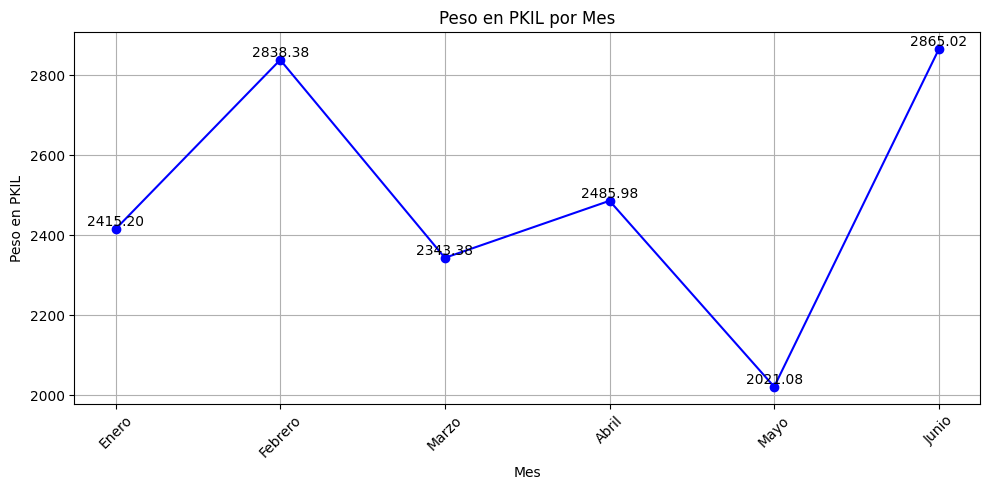

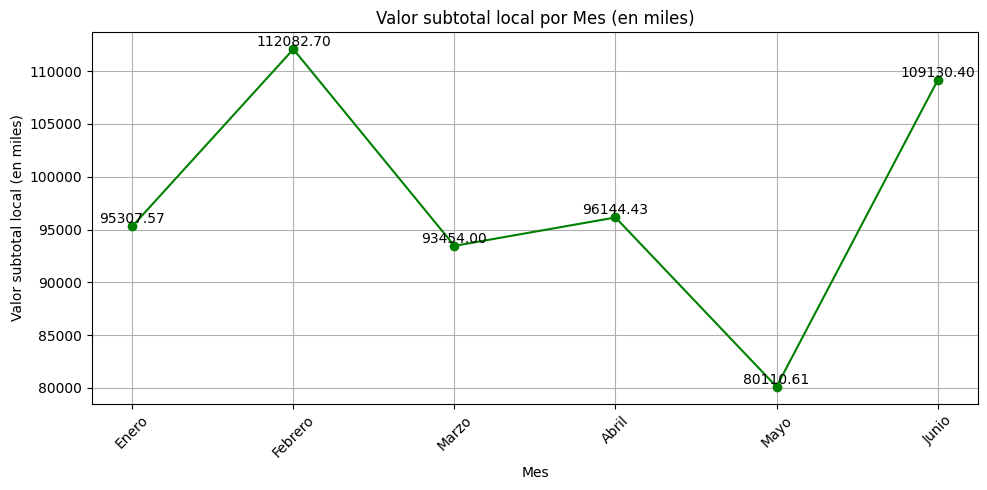

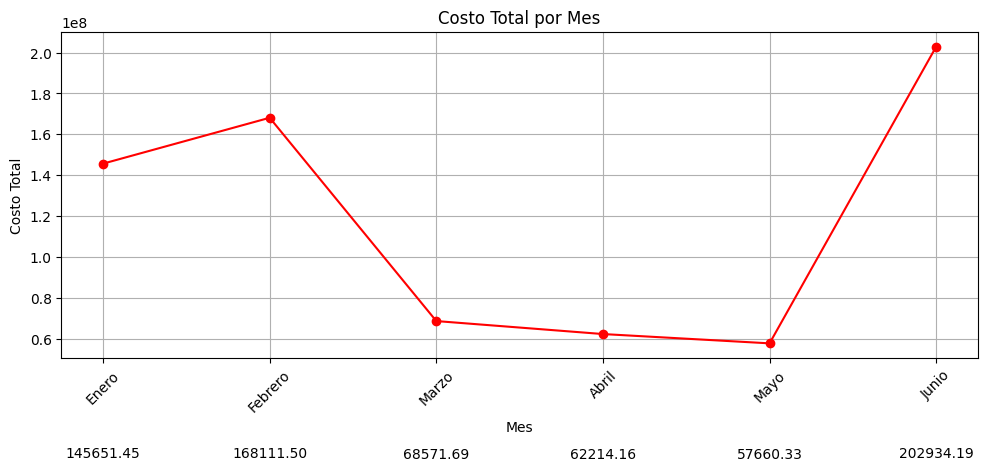

In [ ]:
# Crear la columna 'Costo Total' en el DataFrame 'ventas_costos_df'
ventas_costos_df['Costo Total'] = ventas_costos_df['Peso en PKIL'] * ventas_costos_df['Subtotal']

# Crear un pivote para obtener el total por mes
pivot_ventas_costos = ventas_costos_df.pivot_table(index='Mes', values=['Peso en PKIL', 'Valor subtotal local', 'Costo Total'], aggfunc='sum').reset_index()

# Ordenar la tabla pivote por el orden correcto de los meses
mes_orden = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio"]
pivot_df_sorted = pivot_ventas_costos.set_index('Mes').loc[mes_orden].reset_index()

# Graficar Peso en PKIL por Mes
plt.figure(figsize=(10, 5))
plt.plot(pivot_df_sorted['Mes'], pivot_df_sorted['Peso en PKIL'], marker='o', linestyle='-', color='b')
plt.xlabel('Mes')
plt.ylabel('Peso en PKIL')
plt.title('Peso en PKIL por Mes')
plt.xticks(rotation=45)
for i, value in enumerate(pivot_df_sorted['Peso en PKIL']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar Valor subtotal local (en miles) por Mes
plt.figure(figsize=(10, 5))
plt.plot(pivot_df_sorted['Mes'], pivot_df_sorted['Valor subtotal local'] / 1000, marker='o', linestyle='-', color='g')
plt.xlabel('Mes')
plt.ylabel('Valor subtotal local (en miles)')
plt.title('Valor subtotal local por Mes (en miles)')
plt.xticks(rotation=45)
for i, value in enumerate(pivot_df_sorted['Valor subtotal local'] / 1000):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar Costo Total por Mes
plt.figure(figsize=(10, 5))
plt.plot(pivot_df_sorted['Mes'], pivot_df_sorted['Costo Total'], marker='o', linestyle='-', color='r')
plt.xlabel('Mes')
plt.ylabel('Costo Total')
plt.title('Costo Total por Mes')
plt.xticks(rotation=45)
for i, value in enumerate(pivot_df_sorted['Costo Total']/1000):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.grid(True)
plt.tight_layout()
plt.show()




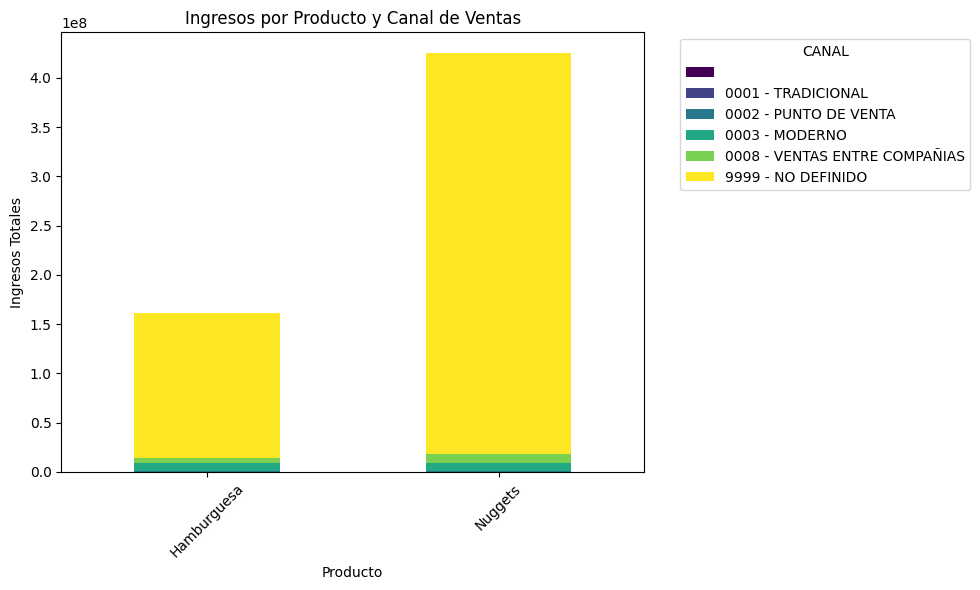

In [ ]:
# Crear un pivote para los ingresos por Producto y Canal de Ventas
pivot_ingresos = ventas_costos_df.pivot_table(index='Producto_y', columns='CANAL', values='Valor subtotal local', aggfunc='sum', fill_value=0)

# Graficar los ingresos por Producto y Canal de Ventas
pivot_ingresos.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Ingresos por Producto y Canal de Ventas')
plt.xlabel('Producto')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)
plt.legend(title='CANAL', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


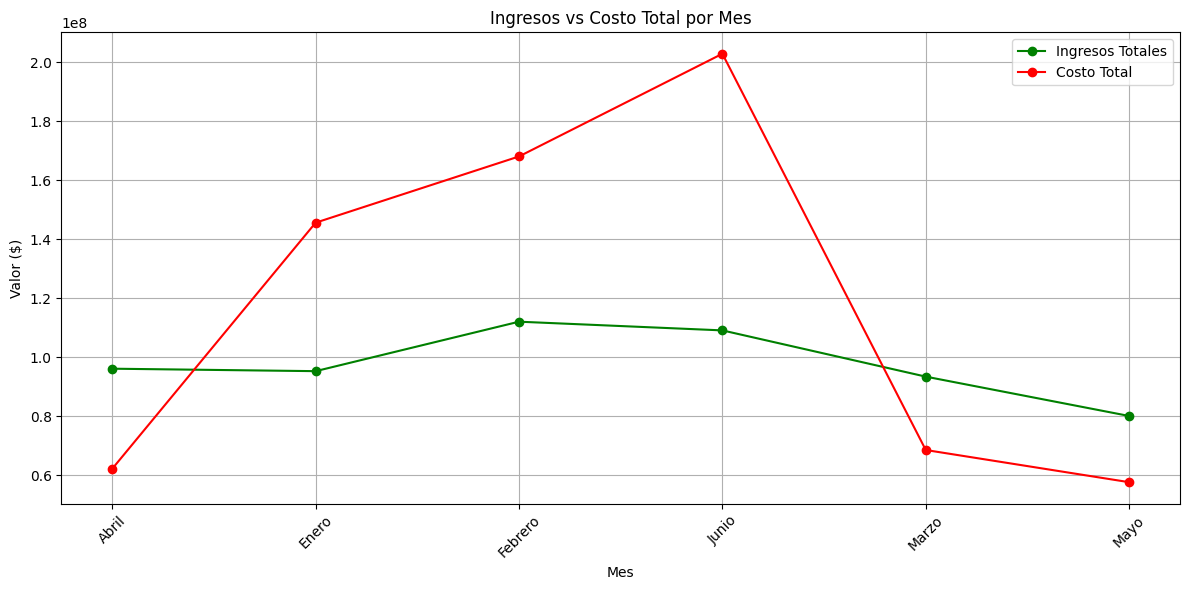

In [ ]:
# Crear un pivote para obtener los totales de Costos y Valor subtotal local por mes
pivot_costos_ingresos = ventas_costos_df.pivot_table(index='Mes', values=['Costo Total', 'Valor subtotal local'], aggfunc='sum').reset_index()

# Graficar Costo Total vs. Ingresos por Mes
plt.figure(figsize=(12, 6))
plt.plot(pivot_costos_ingresos['Mes'], pivot_costos_ingresos['Valor subtotal local'], marker='o', linestyle='-', color='g', label='Ingresos Totales')
plt.plot(pivot_costos_ingresos['Mes'], pivot_costos_ingresos['Costo Total'], marker='o', linestyle='-', color='r', label='Costo Total')
plt.xlabel('Mes')
plt.ylabel('Valor ($)')
plt.title('Ingresos vs Costo Total por Mes')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


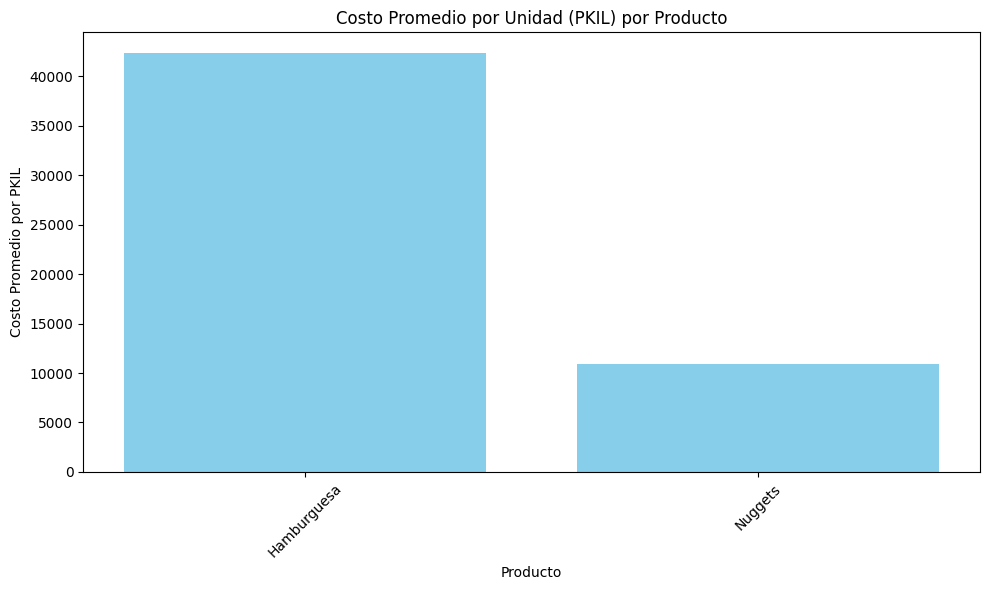

In [ ]:
# Calcular el costo promedio por PKIL para cada producto
ventas_costos_df['Costo por PKIL'] = ventas_costos_df['Costo Total'] / ventas_costos_df['Peso en PKIL']
pivot_costo_pkil = ventas_costos_df.pivot_table(index='Producto_y', values='Costo por PKIL', aggfunc='mean').reset_index()

# Graficar el Costo Promedio por PKIL por Producto
plt.figure(figsize=(10, 6))
plt.bar(pivot_costo_pkil['Producto_y'], pivot_costo_pkil['Costo por PKIL'], color='skyblue')
plt.title('Costo Promedio por Unidad (PKIL) por Producto')
plt.xlabel('Producto')
plt.ylabel('Costo Promedio por PKIL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


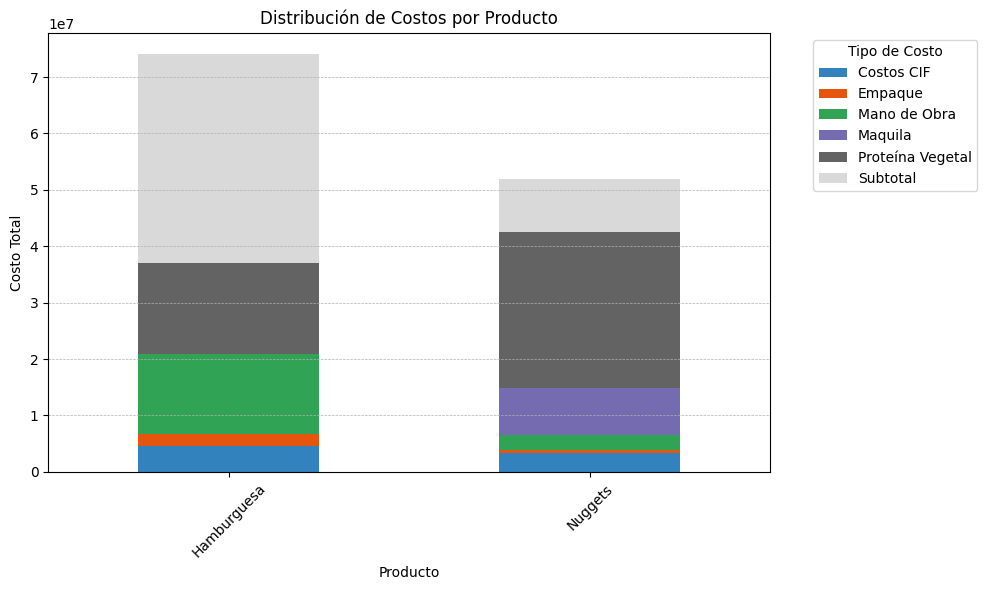

In [ ]:
# Asegurarnos de que las columnas relevantes sean numéricas
cost_columns = ['Costos CIF', 'Empaque', 'Mano de Obra', 'Maquila', 'Proteína Vegetal', 'Subtotal']
ventas_costos_df[cost_columns] = ventas_costos_df[cost_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Crear un pivote con la suma de los costos por categoría para cada producto
pivot_costos_producto = ventas_costos_df.pivot_table(
    index='Producto_y',
    values=cost_columns,
    aggfunc='sum'
).reset_index()

# Configurar el gráfico de barras apiladas
pivot_costos_producto.set_index('Producto_y')[cost_columns].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')

# Configuraciones del gráfico
plt.title('Distribución de Costos por Producto')
plt.xlabel('Producto')
plt.ylabel('Costo Total')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Costo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Mostrar el gráfico
plt.show()


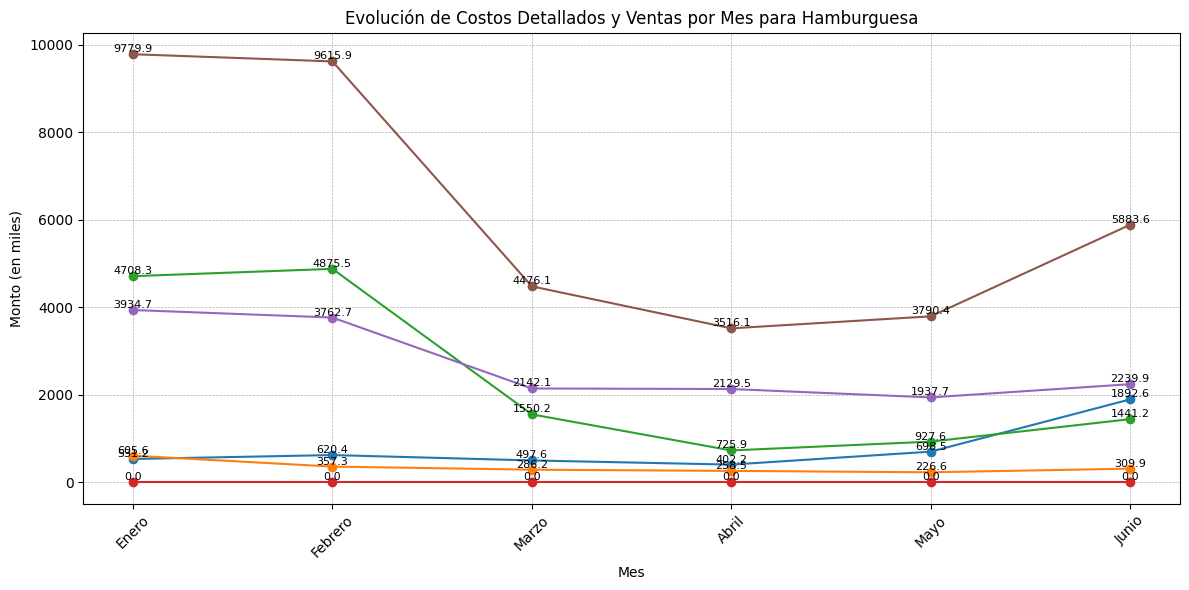

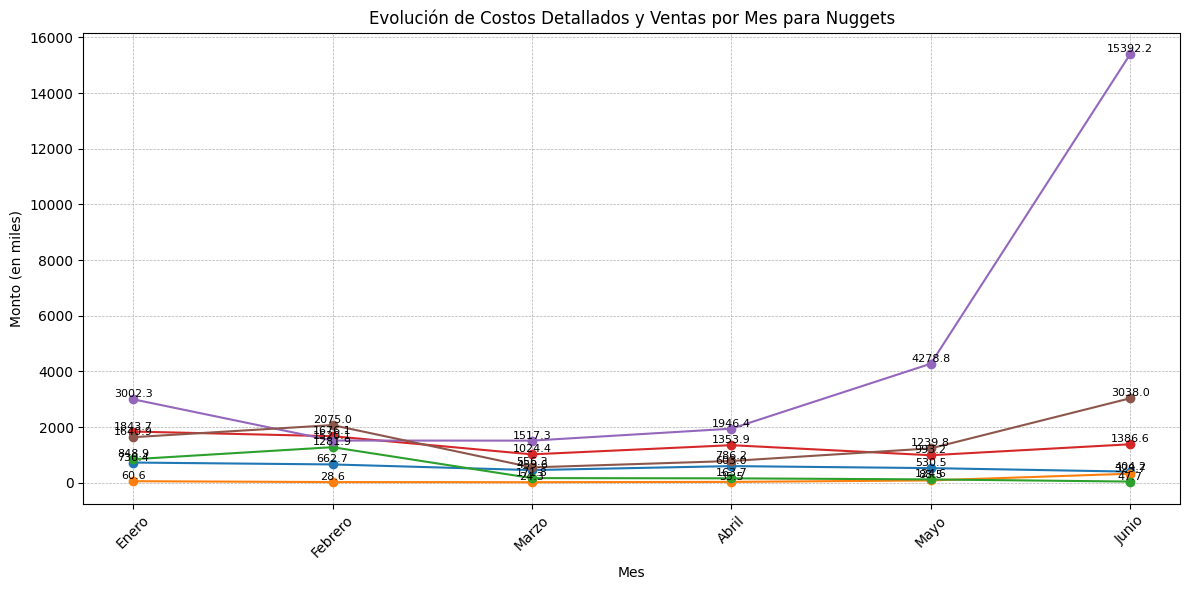

In [ ]:
# Asegúrate de definir 'orden_meses' antes de utilizarlo
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
costos_columnas = ['Costos CIF', 'Empaque', 'Mano de Obra', 'Maquila', 'Proteína Vegetal','Subtotal']

# Iterar a través de cada producto para crear un gráfico separado
productos_unicos = ventas_costos_df['Producto_y'].unique()

for producto in productos_unicos:
    # Filtrar el DataFrame por el producto
    datos_producto = ventas_costos_df[ventas_costos_df['Producto_y'] == producto]

    # Crear una figura para cada producto
    plt.figure(figsize=(12, 6))

    # Iterar a través de las columnas de costos y crear una línea para cada una
    for costo in costos_columnas:
        if costo in datos_producto.columns:
            # Agrupar por mes y sumar los valores para cada tipo de costo
            datos_costo_agrupado = datos_producto.groupby('Mes')[costo].sum().reindex(orden_meses, fill_value=0)

            # Graficar los costos por cada componente
            plt.plot(orden_meses, datos_costo_agrupado / 1000, marker='o', linestyle='-', label=costo)

    # Agregar línea de ventas (Valor subtotal local)
    #ventas_agrupadas = datos_producto.groupby('Mes')['Valor subtotal local'].sum().reindex(orden_meses, fill_value=0)
    #plt.plot(orden_meses, ventas_agrupadas / 1000, marker='o', linestyle='--', color='r', label='Ventas (Ingresos)')

    # Configurar el gráfico
    plt.title(f'Evolución de Costos Detallados y Ventas por Mes para {producto}')
    plt.xlabel('Mes')
    plt.ylabel('Monto (en miles)')
    plt.xticks(rotation=45)
   # plt.legend(title='Componente del Costo / Ventas')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()

    # Agregar etiquetas para cada punto en los gráficos (en miles)
    for i, mes in enumerate(orden_meses):
        # Etiquetas para los costos
        for costo in costos_columnas:
            if costo in datos_producto.columns:
                valor = datos_producto.groupby('Mes')[costo].sum().reindex(orden_meses, fill_value=0).loc[mes]
                plt.text(i, valor / 1000, f'{valor / 1000:.1f}', ha='center', va='bottom', fontsize=8)

        # Etiquetas para las ventas
        #valor_venta = ventas_agrupadas.loc[mes]
        #plt.text(i, valor_venta / 1000, f'{valor_venta / 1000:.1f}', ha='center', va='bottom', color='red', fontsize=8)

    # Mostrar el gráfico
    plt.show()



##3. Análisis de Datos Exploratorio

#3.1 Estadística Descriptiva

En esta sección realizaremos un resumen estadístico para los datos de ventas_costos_df. Este tipo de análisis proporciona una visión global sobre las principales características de las variables cuantitativas en el conjunto de datos, incluyendo los costos, ventas y producción.

In [ ]:
# Cálculo de estadísticas descriptivas para el DataFrame ventas_costos_df
descripcion = ventas_costos_df.describe()
print("Estadística descriptiva del conjunto de datos:\n", descripcion)

Estadística descriptiva del conjunto de datos:
        Peso en PKIL  Precio por PKIL  Precio por UNID  Valor subtotal local  \
count       1760.00          1760.00          1760.00               1760.00   
mean           8.51         56304.02         18421.41             333085.05   
min          -49.92          2196.15          1015.00           -2171880.00   
25%            0.26         32040.00         12042.26               7975.00   
50%            0.80         39552.50         12816.00              35690.50   
75%            6.06         46065.19         13493.00             239713.50   
max          349.44       4871911.54       1342592.00           14738304.00   
std           25.77        209676.53         63164.31            1043435.07   

       Valor bruto local  Precio unit.                          Fecha     Año  \
count            1760.00       1760.00                           1760 1760.00   
mean           333517.58      18421.41  2024-04-07 18:47:27.272727296 2024.00 

Las principales medidas incluidas serán la media, mediana, desviación estándar, valores máximos y mínimos. Esto permite identificar patrones y posibles valores atípicos.

Media y Mediana: Ayudan a identificar tendencias generales en los costos y ventas.

Desviación Estándar: Indica la dispersión de los datos alrededor de la media.

Máximos y Mínimos: Señalan valores atípicos potenciales o meses de particular interés.

#3.2 Visualización de Datos

Para obtener una visión más clara del comportamiento de los costos y ventas, crearemos gráficos que ilustren estas variables a lo largo de los meses y por producto.

Distribución de Costos: Visualizaremos cómo se distribuyen los distintos componentes de los costos por producto usando gráficos de torta, para mostrar proporciones entre costos como Costos CIF, Empaque, Mano de Obra, Maquila, y Proteína Vegetal.

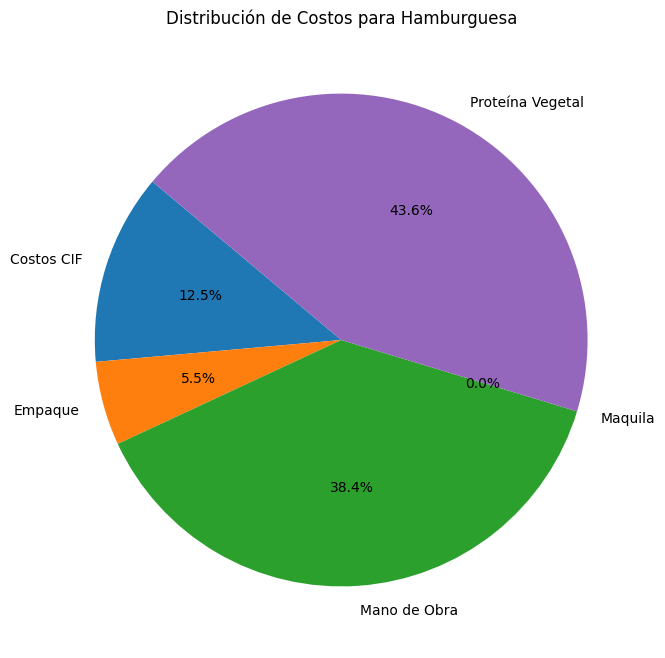

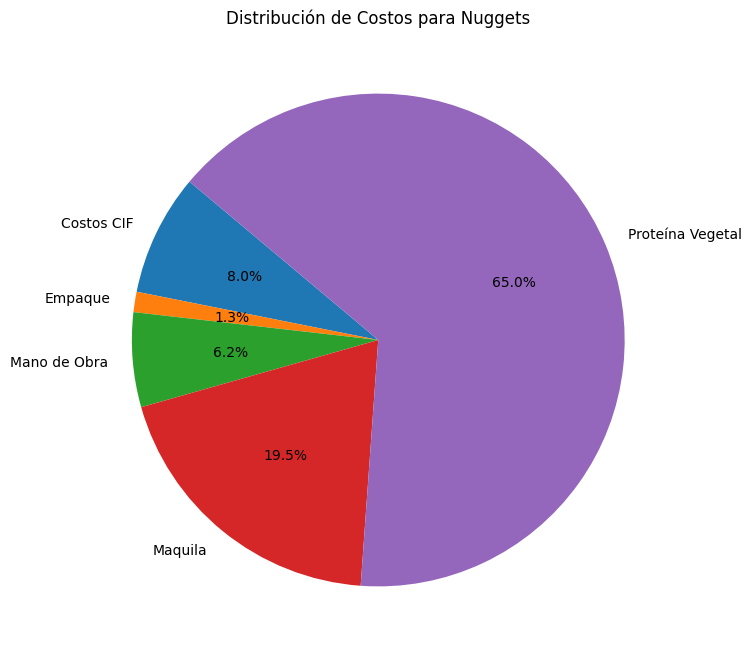

In [ ]:
# Crear un gráfico de torta para mostrar la distribución de costos
for producto in ventas_costos_df['Producto_y'].unique():
    datos_producto = ventas_costos_df[ventas_costos_df['Producto_y'] == producto]
    costos_totales = datos_producto[['Costos CIF', 'Empaque', 'Mano de Obra', 'Maquila', 'Proteína Vegetal']].sum()
    plt.figure(figsize=(8, 8))
    plt.pie(costos_totales, labels=costos_totales.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribución de Costos para {producto}')
    plt.show()

Comparación Mensual de Costos y Ventas: Utilizaremos gráficos de línea para comparar los costos de producción y las ventas por cada producto a lo largo del tiempo.

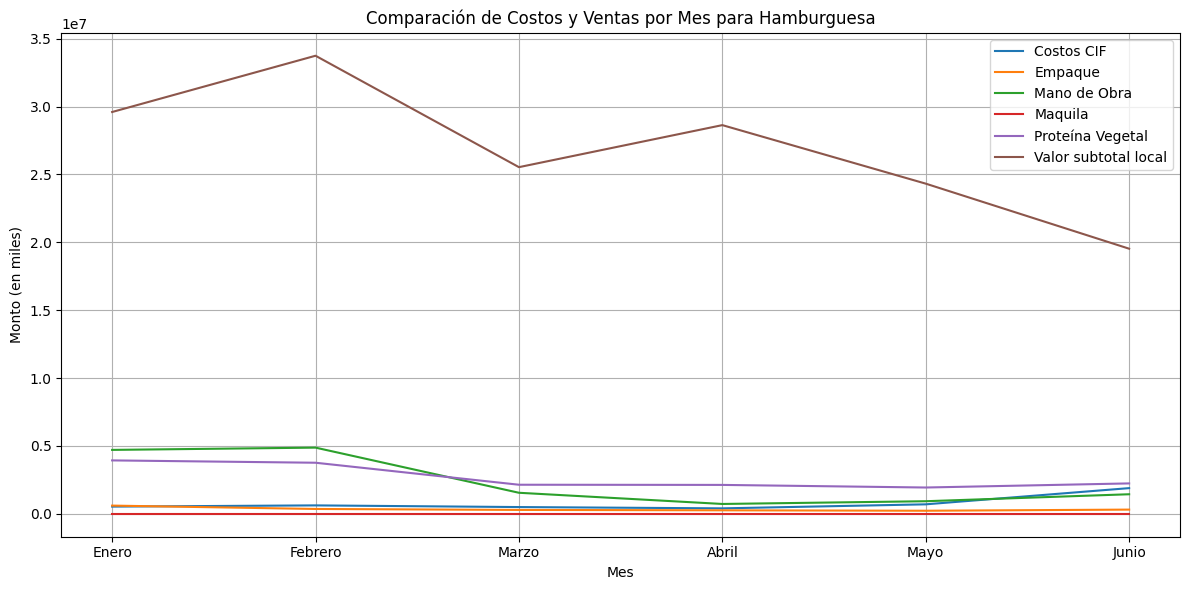

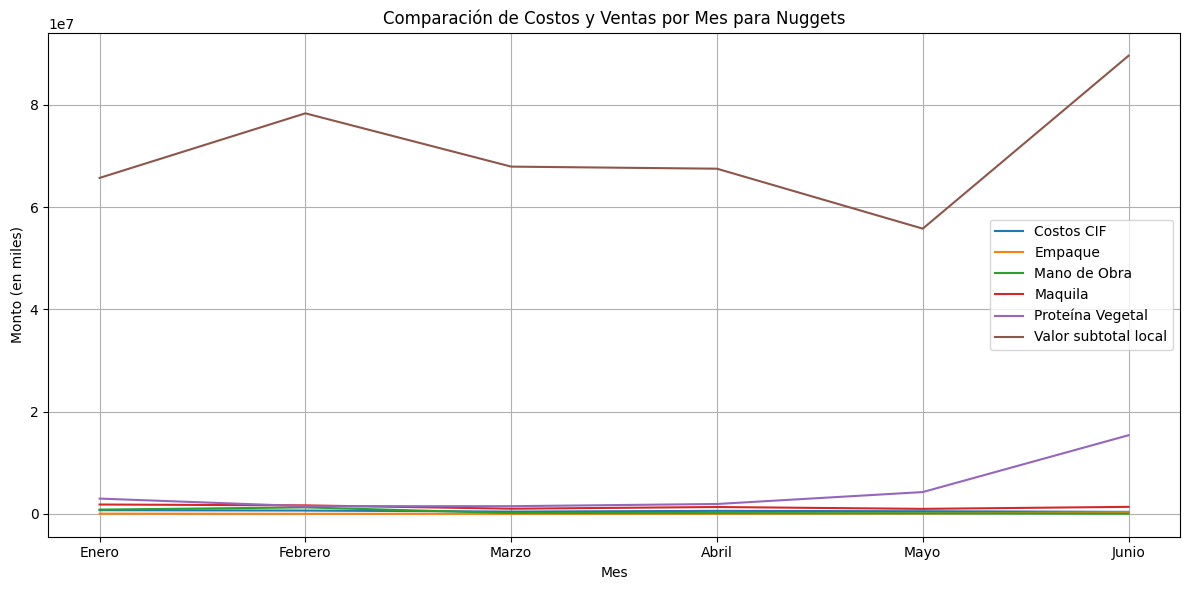

In [ ]:
# Crear gráfico de línea para costos y ventas por mes
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

for producto in ventas_costos_df['Producto_y'].unique():
    datos_producto = ventas_costos_df[ventas_costos_df['Producto_y'] == producto]
    plt.figure(figsize=(12, 6))
    for columna in ['Costos CIF', 'Empaque', 'Mano de Obra', 'Maquila', 'Proteína Vegetal', 'Valor subtotal local']:
        plt.plot(orden_meses, datos_producto.groupby('Mes')[columna].sum().reindex(orden_meses, fill_value=0), label=columna)
    plt.xlabel('Mes')
    plt.ylabel('Monto (en miles)')
    plt.title(f'Comparación de Costos y Ventas por Mes para {producto}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#3.3 Análisis de la Serie de Tiempo

El análisis de series de tiempo nos ayudará a entender patrones en los costos y ventas a lo largo del tiempo, como estacionalidades o tendencias que puedan existir en el comportamiento de los productos.

Descomposición de Series Temporales: Realizaremos una descomposición para analizar los componentes de tendencia y estacionalidad en las ventas de productos como Hamburguesa y Nuggets.

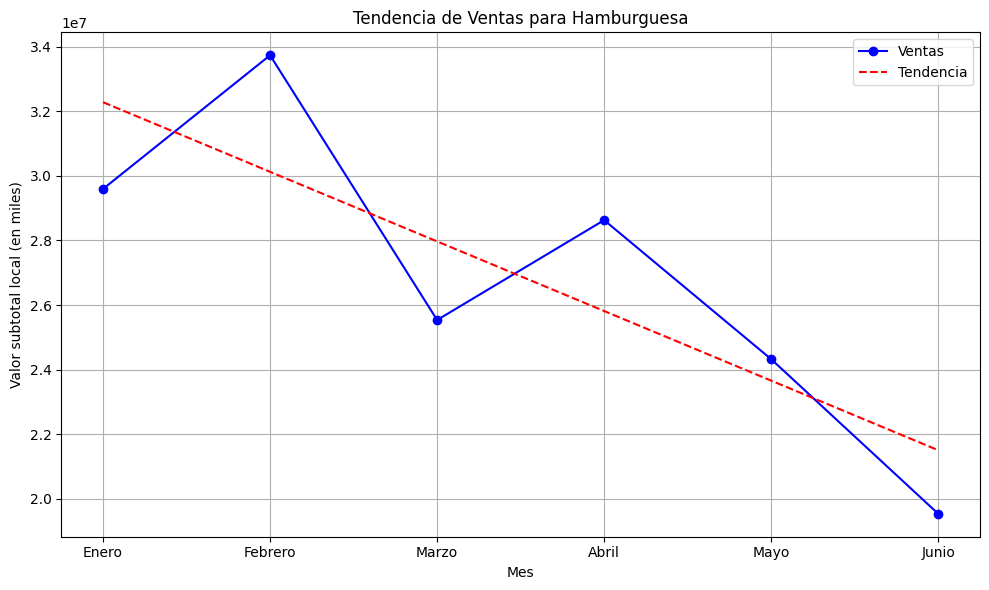

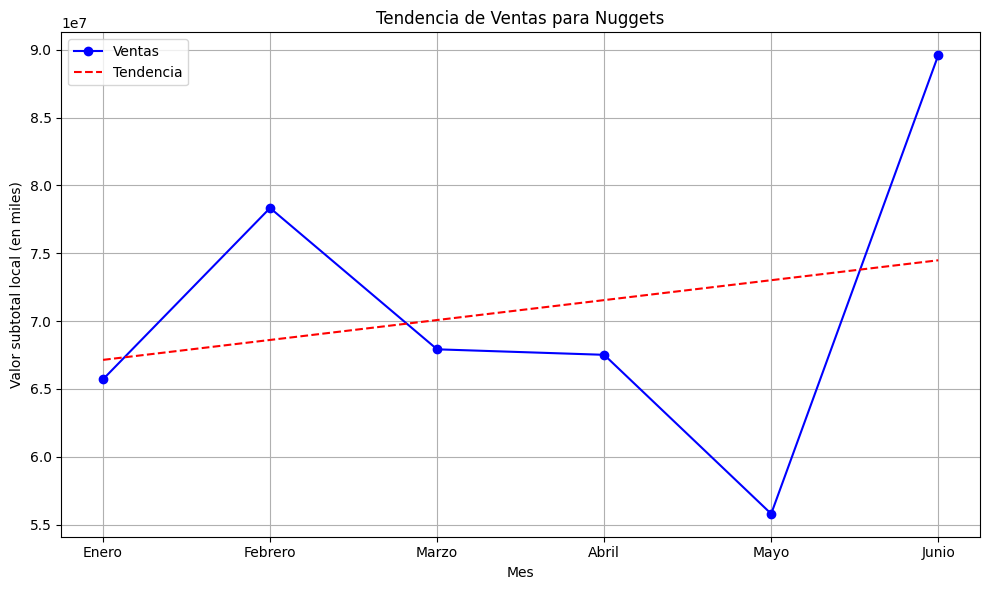

In [ ]:


# Preparar datos para ajuste lineal
meses = np.array([0, 1, 2, 3, 4, 5]).reshape(-1, 1)  # Representando enero a junio como 0 a 5

for producto in ventas_costos_df['Producto_y'].unique():
    datos_producto = ventas_costos_df[ventas_costos_df['Producto_y'] == producto]
    ventas = datos_producto.groupby('Mes')['Valor subtotal local'].sum().reindex(orden_meses, fill_value=0).values

    # Ajuste de regresión lineal
    modelo = LinearRegression()
    modelo.fit(meses, ventas)
    tendencia = modelo.predict(meses)

    # Graficar la serie de tiempo y la tendencia
    plt.figure(figsize=(10, 6))
    plt.plot(orden_meses, ventas, marker='o', linestyle='-', label='Ventas', color='b')
    plt.plot(orden_meses, tendencia, linestyle='--', label='Tendencia', color='r')
    plt.xlabel('Mes')
    plt.ylabel('Valor subtotal local (en miles)')
    plt.title(f'Tendencia de Ventas para {producto}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


##5. Modelos Predictivos

#5.1 Regresión Lineal

Para predecir las ventas y costos de los próximos meses, utilizaremos un modelo de regresión lineal basado en los datos históricos. La regresión lineal permite estimar cómo varían los costos y ventas según el tiempo.

In [ ]:

X = meses  # Meses de enero a junio representados como 0 a 5
y = ventas  # Ventas agrupadas por mes

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones y calcular el error
y_pred = modelo.predict(X_test)
error = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio: {error:.2f}')

Error Cuadrático Medio: 330777485006126.62


#6. ARIMA

Dado que los datos son limitados, el modelo ARIMA puede ser útil para predecir valores futuros basados en las observaciones actuales y pasadas. Sin embargo, es importante notar que para un ARIMA robusto se requieren al menos 12 puntos de datos para capturar estacionalidades completas.

In [ ]:
# Preparar datos de ventas para 'Nuggets'
ventas_nuggets = ventas_costos_df[ventas_costos_df['Producto_y'] == 'Nuggets'].groupby('Mes')['Valor subtotal local'].sum().reindex(orden_meses, fill_value=0)

# Entrenar un modelo ARIMA en la serie de ventas para 'Nuggets'
modelo_arima = ARIMA(ventas_nuggets, order=(1, 1, 1))
modelo_arima_fit = modelo_arima.fit()

# Realizar una predicción para los próximos 3 meses
prediccion = modelo_arima_fit.forecast(steps=3)
print("Predicción de Ventas para los próximos 3 meses:")
print(prediccion)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

Predicción de Ventas para los próximos 3 meses:
6   48494264.64
7   89592188.20
8   48504903.68
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


#7. Optimización de la Cadena de Suministro

Para la optimización de la cadena de suministro, solicitaremos al usuario que ingrese el volumen de ventas proyectado para el próximo mes. Con base en este volumen, calcularemos el costo estimado utilizando el promedio de los costos de los últimos 3 meses y realizaremos un ajuste en la base de datos.

In [ ]:
# Solicitar el volumen de ventas proyectado al usuario
volumen_proyectado = float(input("Ingrese el volumen de ventas proyectado para el próximo mes: "))

# Calcular el costo promedio de los últimos 3 meses
costo_promedio = ventas_costos_df[['Costos CIF', 'Empaque', 'Mano de Obra', 'Maquila', 'Proteína Vegetal']].tail(3).mean()

# Estimar el costo total basado en el volumen proyectado
costo_estimado = volumen_proyectado * costo_promedio.sum()
print(f"Costo estimado para el próximo mes: {costo_estimado:.2f}")

Ingrese el volumen de ventas proyectado para el próximo mes: 2548.1
Costo estimado para el próximo mes: 123472016.14


In [ ]:
# Procesar las fechas y seleccionar columnas de interés para el análisis
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
columns_of_interest = [
    ' Utilidad Bruta ', ' Utilidad Operativa ', ' Ebitda ',
    ' Utilidad Antes de Impuestos ', ' Utilidad del Ejercicio ', ' Utilidad Neta '
]

# Limpiar los nombres de las columnas eliminando espacios extra
data.columns = data.columns.str.strip()
columns_of_interest = [col.strip() for col in columns_of_interest]

# Seleccionar las columnas relevantes
time_series_data = data[['Fecha'] + columns_of_interest].dropna()

# Agrupar por mes y sumar los valores
time_series_data = time_series_data.groupby('Fecha').sum()

# Resamplear a datos mensuales
monthly_data = time_series_data.resample('M').sum()

# Verificar los datos procesados
monthly_data.head()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

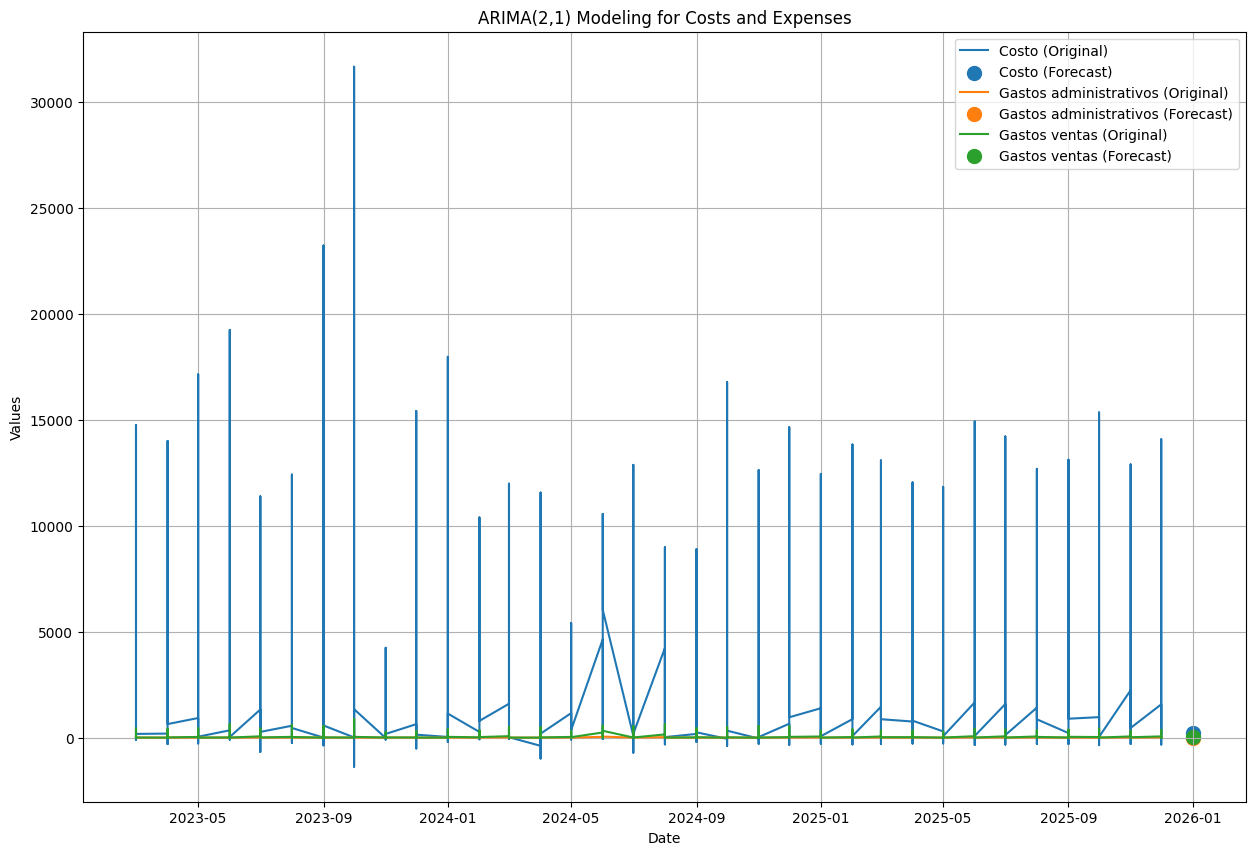

{'Costo': 3035    236.871915
 dtype: float64,
 'Gastos administrativos': 3035    1.467747
 dtype: float64,
 'Gastos ventas': 3035    7.664038
 dtype: float64}

In [ ]:
# Importar librerías necesarias
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


ER_df

# Asegúrate de que la columna de fecha esté correctamente convertida a tipo datetime
ER_df['Fecha'] = pd.to_datetime(ER_df['Fecha'], errors='coerce')

# Filtrar las columnas relevantes de costos y gastos
cost_columns = ['Costo', 'Gastos administrativos', 'Gastos ventas']

# Limpiar los datos de las columnas seleccionadas
for column in cost_columns:
    ER_df[column] = pd.to_numeric(
        ER_df[column].replace(r'[^\d.-]', '', regex=True), errors='coerce'
    )

# Eliminar filas con valores faltantes en las columnas de interés
ER_df_clean = ER_df.dropna(subset=cost_columns)

# Asegurarse de que los datos estén ordenados por fecha
ER_df_clean = ER_df_clean.sort_values(by='Fecha')

# Establecer la columna de fecha como índice
ER_df_clean.set_index('Fecha', inplace=True)

# Ajustar el modelo ARIMA(2, 1) para cada columna y hacer las predicciones
def arima_model_for_costs(data, columns, order=(2, 1, 0), forecast_steps=1):
    forecasts = {}
    plt.figure(figsize=(15, 10))

    for column in columns:
        ts_data = data[column]
        model = ARIMA(ts_data, order=order)
        fitted_model = model.fit()
        forecast = fitted_model.forecast(steps=forecast_steps)
        forecast_index = [data.index[-1] + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]
        forecasts[column] = forecast

        # Graficar la serie original y la predicción
        plt.plot(ts_data, label=f"{column} (Original)")
        plt.scatter(forecast_index, forecast, label=f"{column} (Forecast)", marker="o", s=100)

    # Configurar la gráfica
    plt.title("ARIMA(2,1) Modeling for Costs and Expenses")
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.legend()
    plt.grid()
    plt.show()

    return forecasts

# Ejecutar el modelo ARIMA(2, 1)
forecast_results = arima_model_for_costs(ER_df_clean, cost_columns)

# Mostrar las predicciones
forecast_results


